In [180]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [181]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings
import seaborn as sns

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data


In [182]:
# 1. Handle Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Visualize missing values
fig = go.Figure(data=[go.Bar(x=df.columns, y=missing_values)])
fig.update_layout(title="Missing Values per Column")
fig.show()

# Handle missing values based on data characteristics and requirements
# For numerical columns, you might fill missing values with mean, median, or a specific value
# For categorical columns, you might fill missing values with a mode or a specific value
# Drop columns or rows with excessive missing values based on your threshold

# Example: Filling missing values with mean for numerical columns and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with mode
    else:
        df[col] = df[col].fillna(df[col].mean())  # Fill missing values with mean

# 2. Remove Duplicates
# Check for duplicate rows based on unique identifier columns
duplicate_rows = df.duplicated()
print("Duplicate Rows:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# 3. Check for Data Consistency
# Data types, formats, and consistency checks
print("Data Types:")
print(df.dtypes)

# Perform additional consistency checks as needed
# Convert data types if necessary

# 4. Handle Outliers (Optional)
# Identify and handle outliers in numerical columns
# Visualize distributions and use statistical methods like z-score or IQR

# Example: Handling outliers in the 'Age' column using z-score
z_scores = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())
outlier_threshold = 3  # Define a threshold for z-score
outliers = z_scores > outlier_threshold
print("Number of Outliers in Age column:", outliers.sum())

# Remove outliers
df = df[~outliers]

# Now, the DataFrame 'df' should be cleaned and ready for further analysis


Missing Values:
Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


Duplicate Rows: 0
Data Types:
Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object
Number of Outliers in Age column: 0


In [183]:
# Create a dictionary to store outlier counts for each numerical column
outlier_counts = {}

# Iterate over each numerical column
for col in df.select_dtypes(include=np.number).columns:
    # Calculate z-scores for each numerical column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold for z-score
    outlier_threshold = 3

    # Identify outliers
    outliers = z_scores > outlier_threshold

    # Count outliers in the column
    outlier_count = outliers.sum()
    outlier_counts[col] = outlier_count

    # Remove outliers
    df = df[~outliers]

# Print the number of outliers detected in each numerical column
print("Outlier Counts per Numerical Column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Print additional information about the cleaning process
print("Cleaning Summary:")
print(f"Original DataFrame shape: {df.shape}")
print("Outliers removed from all numerical columns.")
print(f"Cleaned DataFrame shape: {df.shape}")

# Now, the DataFrame 'df' should be cleaned with outliers removed from all numerical columns


Outlier Counts per Numerical Column:
Age: 0
Cleaning Summary:
Original DataFrame shape: (295857, 15)
Outliers removed from all numerical columns.
Cleaned DataFrame shape: (295857, 15)


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295857 entries, 0 to 295856
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Passenger ID          295857 non-null  object
 1   First Name            295857 non-null  object
 2   Last Name             295857 non-null  object
 3   Gender                295857 non-null  object
 4   Age                   295857 non-null  int64 
 5   Nationality           295857 non-null  object
 6   Airport Name          295857 non-null  object
 7   Airport Country Code  295857 non-null  object
 8   Country Name          295857 non-null  object
 9   Airport Continent     295857 non-null  object
 10  Continents            295857 non-null  object
 11  Departure Date        295857 non-null  object
 12  Arrival Airport       295857 non-null  object
 13  Pilot Name            295857 non-null  object
 14  Flight Status         295857 non-null  object
dtypes: int64(1), obje

In [185]:
import pandas as pd
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df['Month'] = df['Departure Date'].dt.month
df['Day'] = df['Departure Date'].dt.day
df['Year'] = df['Departure Date'].dt.year

df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Month,Day,Year
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,6.0,28.0,2022.0
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,12.0,26.0,2022.0
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,1.0,18.0,2022.0
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,9.0,16.0,2022.0
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,2.0,25.0,2022.0


In [186]:
columns_to_keep = [
    'Gender', 'Age', 'Nationality', 'Airport Name', 'Country Name',
    'Continents', 'Arrival Airport', 'Flight Status', 'Month', 'Day'
]
df = df[columns_to_keep]
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


In [187]:
df.rename(columns={"Airport Name": "Airport_Name",
                  "Country Name": "Country_Name",
                  "Arrival Airport": "Arrival_Airport",
                  "Flight Status": "Flight_Status"},inplace = True)
df.head()

,Gender,Age,Nationality,Airport_Name,Country_Name,Continents,Arrival_Airport,Flight_Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


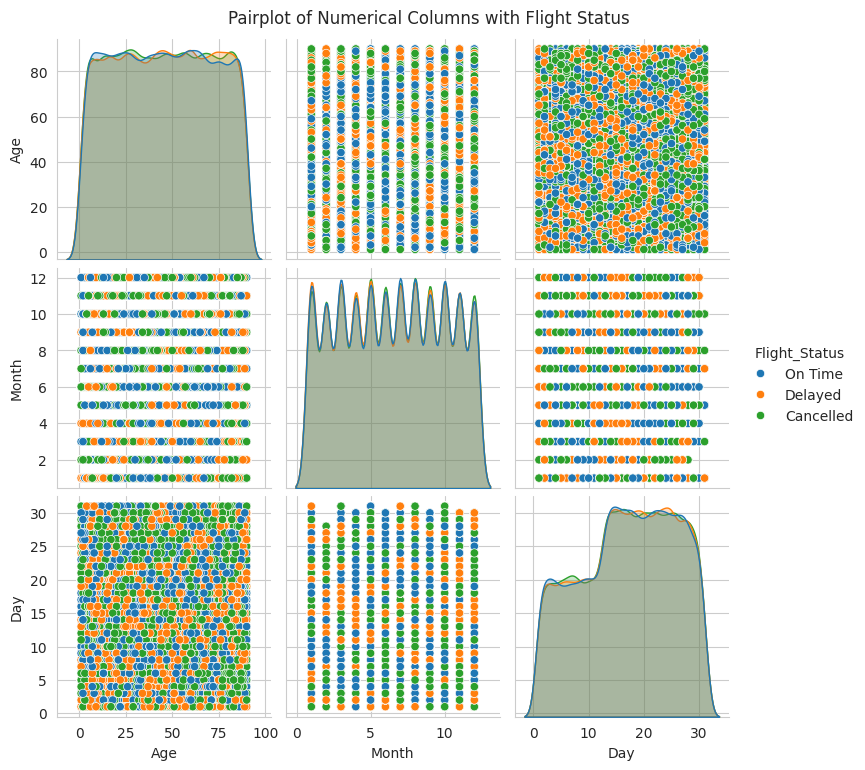

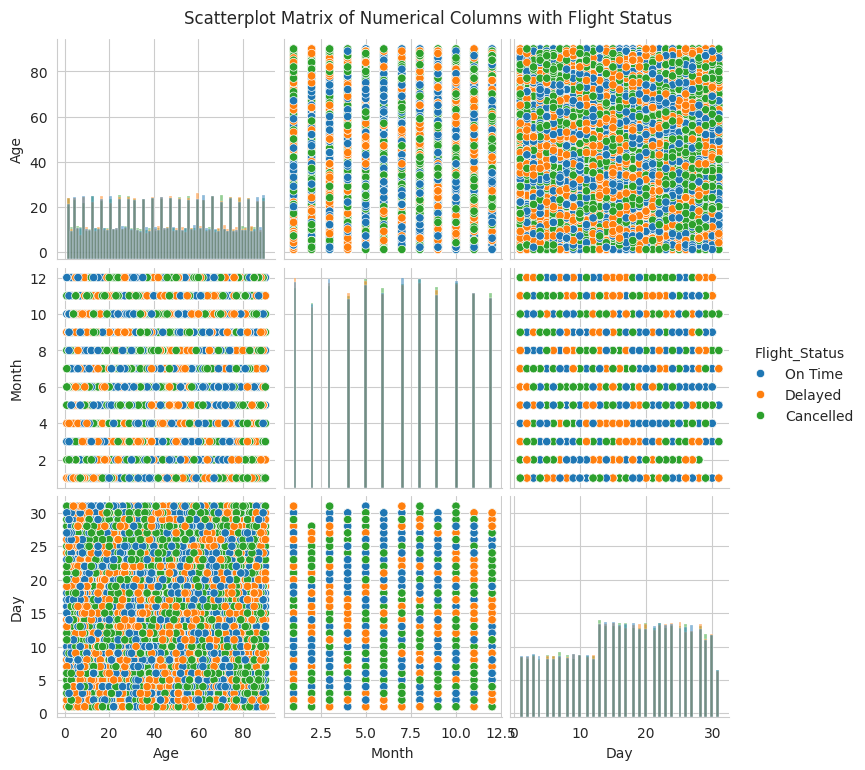

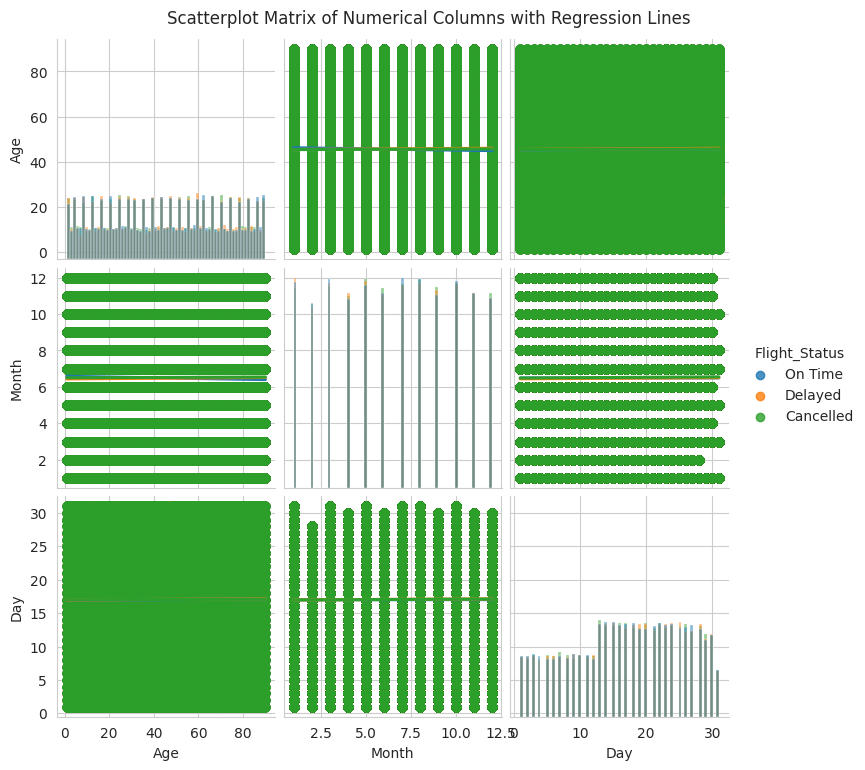

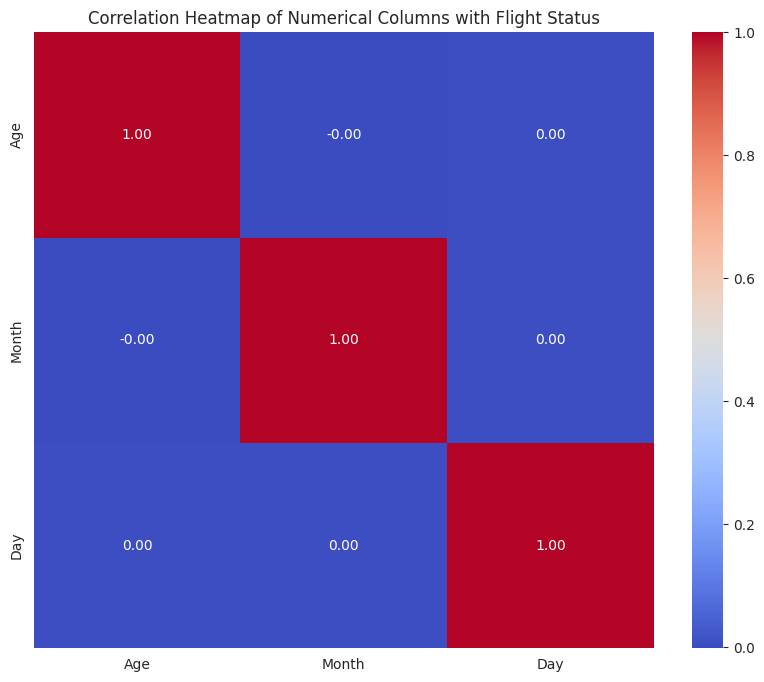

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Multivariate Analysis
# Pairplot for numerical columns with hue based on a categorical column
sns.pairplot(df, hue='Flight_Status', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns with Flight Status', y=1.02)
plt.show()

# Scatterplot matrix for numerical columns with hue based on a categorical column
sns.pairplot(df, hue='Flight_Status', diag_kind='hist')
plt.suptitle('Scatterplot Matrix of Numerical Columns with Flight Status', y=1.02)
plt.show()

# Scatterplot matrix with regression lines for numerical columns with hue based on a categorical column
sns.pairplot(df, hue='Flight_Status', kind='reg', diag_kind='hist')
plt.suptitle('Scatterplot Matrix of Numerical Columns with Regression Lines', y=1.02)
plt.show()

# Heatmap for correlation matrix of numerical columns with Flight Status
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns with Flight Status')
plt.show()


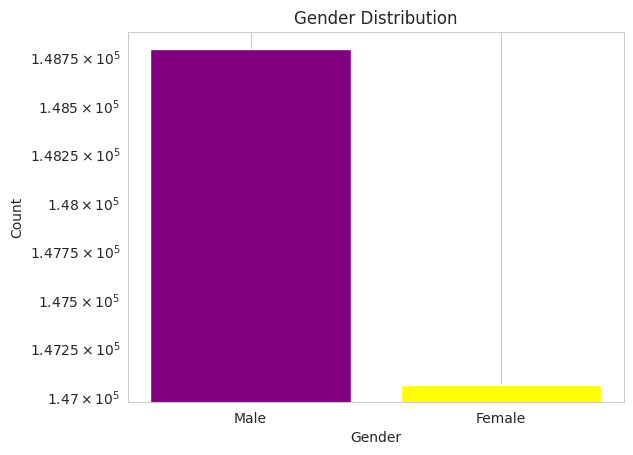

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()
colors = ['purple', 'yellow']

plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Change the scale of the y-axis
plt.yscale('log')  # Set y-axis scale to logarithmic

plt.show()


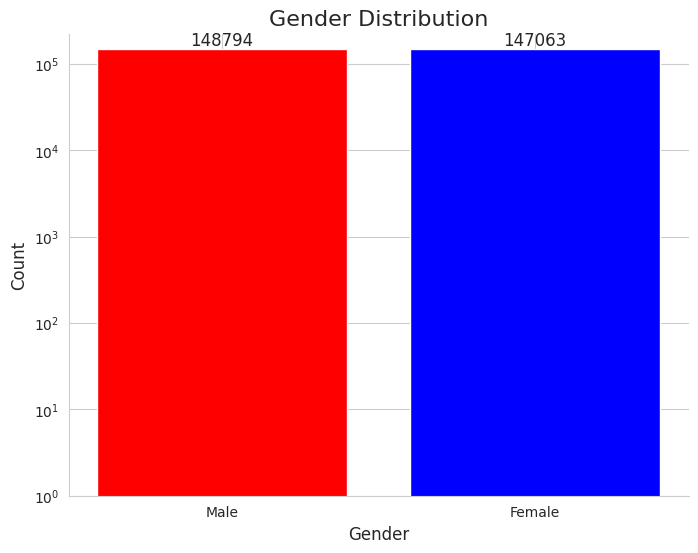

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Gender' column
gender_counts = df['Gender'].value_counts()
colors = ['red', 'blue']
plt.figure(figsize=(8, 6))

# Define scale factors for each gender
male_scale = 1.5  # Adjust as necessary to suit your data
female_scale = 1.5  # Adjust as necessary to suit your data

plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution', fontsize=16)

# Display count labels above the bars
for i, count in enumerate(gender_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Set different y-axis scales for each gender
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.ylim(1, max(gender_counts) * male_scale)  # Scale for male
plt.ylim(1, max(gender_counts) * female_scale)  # Scale for female

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


Flight_Status  Gender
Cancelled      Male      49470
               Female    49356
Delayed        Male      49620
               Female    48873
On Time        Male      49704
               Female    48834
Name: count, dtype: int64


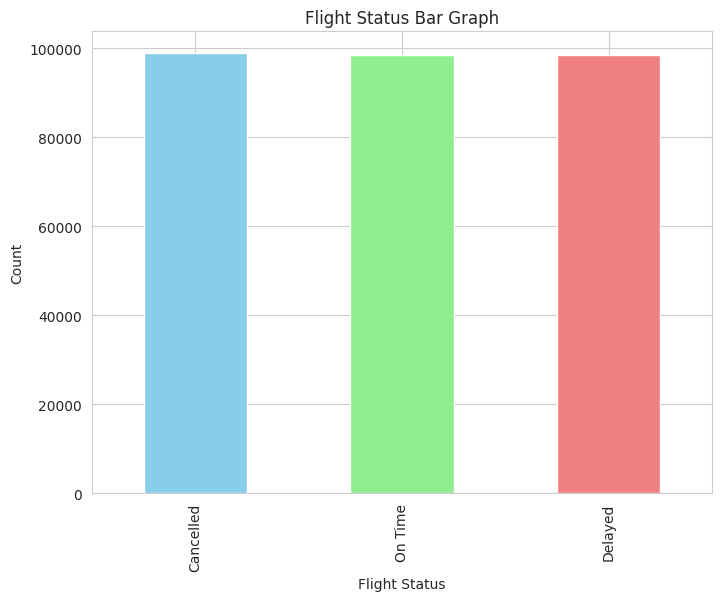

In [191]:
flight_status_counts = df['Flight_Status'].value_counts()
colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
flight_status_counts.plot(kind='bar', color=colors)
plt.title('Flight Status Bar Graph')
plt.xlabel('Flight Status')
plt.ylabel('Count')
print(df.groupby("Flight_Status")["Gender"].value_counts())

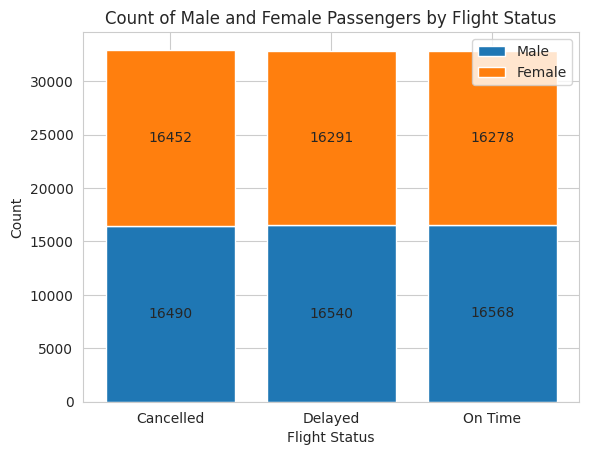

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Flight Status categories
flight_status = ["Cancelled", "Delayed", "On Time"]

# Count of passengers by gender and flight status
sex_counts = {
    "Male": np.array([16490, 16540, 16568]),
    "Female": np.array([16452, 16291, 16278])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(flight_status,sex_count,label = sex, bottom = bottom)
    bottom+=sex_count
    ax.bar_label(p, label_type = "center")

ax.legend()
plt.title('Count of Male and Female Passengers by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()

In [193]:
print(df.groupby("Continents")["Flight_Status"].value_counts())

Continents     Flight_Status
Africa         On Time          11157
               Cancelled        10971
               Delayed          10962
Asia           On Time          18726
               Cancelled        18705
               Delayed          18480
Europe         Delayed          12534
               Cancelled        12285
               On Time          12186
North America  Delayed          32088
               Cancelled        32079
               On Time          31932
Oceania        Delayed          13902
               Cancelled        13857
               On Time          13839
South America  Cancelled        10929
               On Time          10698
               Delayed          10527
Name: count, dtype: int64


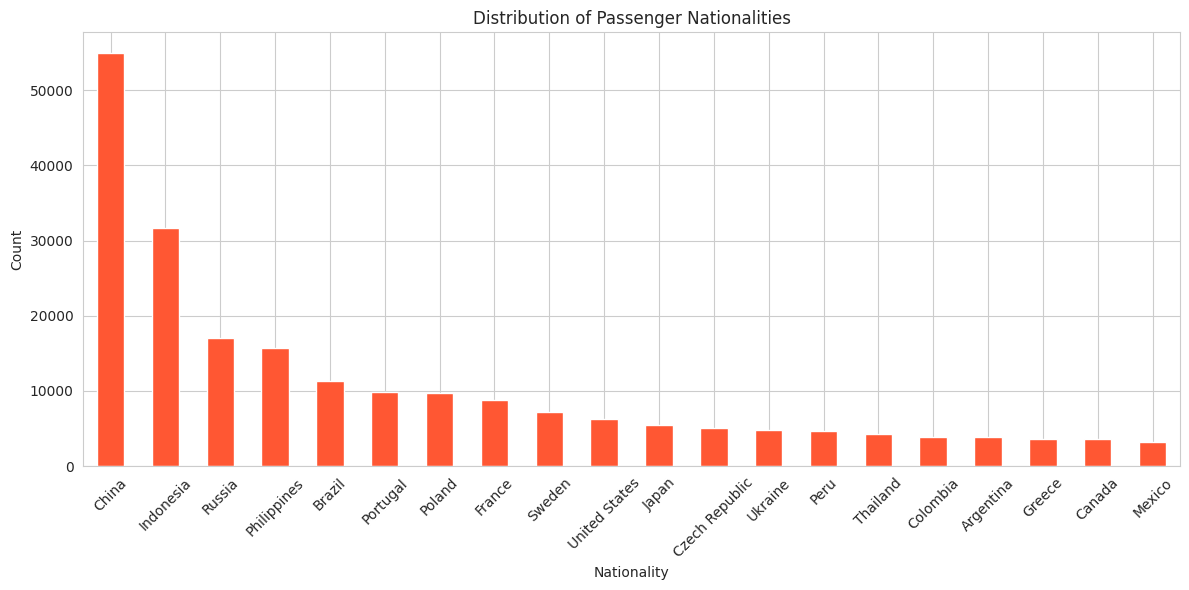

In [194]:
nationality_counts = df['Nationality'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(12, 6))
nationality_counts.plot(kind='bar', color='#FF5733')
plt.title('Distribution of Passenger Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['Gender', 'Age', 'Nationality', 'Airport_Name', 'Country_Name',
       'Continents', 'Arrival_Airport', 'Flight_Status', 'Month', 'Day'],
      dtype='object')


<ipython-input-195-977ae6be3c80>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




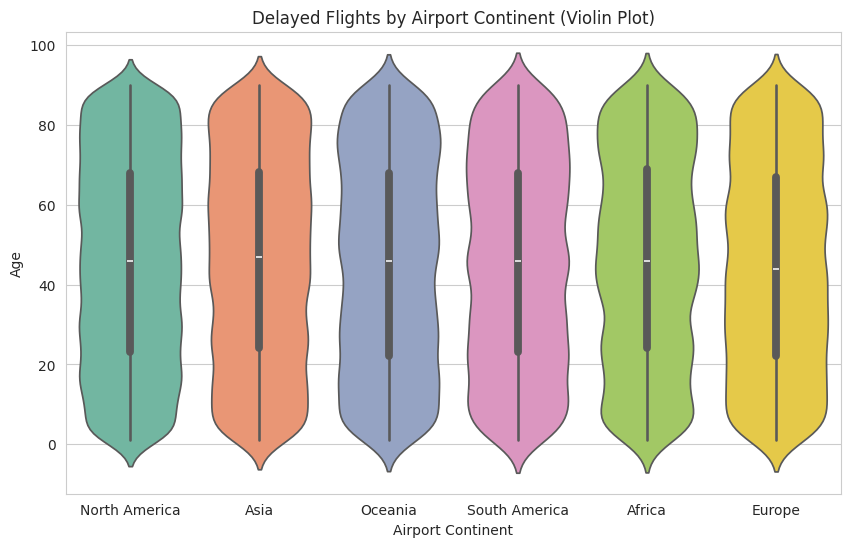

In [195]:
# Check the column names in your DataFrame
print(df.columns)

# Assuming the column name is 'Airport_Continent', update the violin plot code
plt.figure(figsize=(10, 6))
sns.violinplot(x='Continents', y='Age', data=df[df['Flight_Status'] == 'Delayed'], palette='Set2')
plt.title('Delayed Flights by Airport Continent (Violin Plot)')
plt.xlabel('Airport Continent')
plt.ylabel('Age')
plt.show()


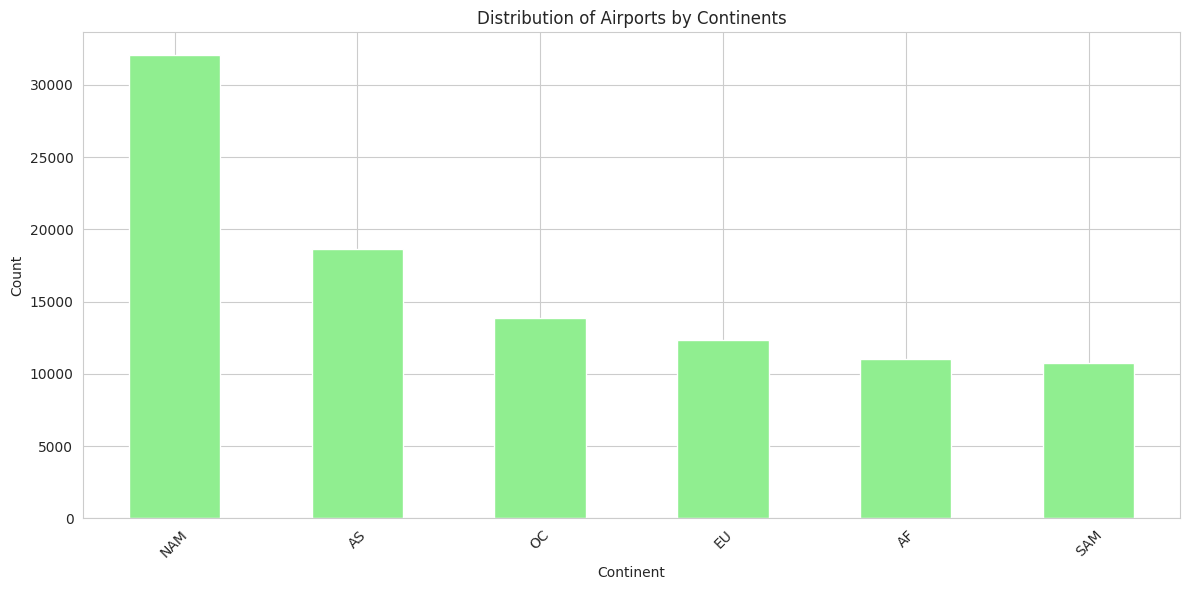

In [196]:
df = pd.DataFrame(data)
airport_counts = df['Airport Continent'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
airport_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Airports by Continents')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

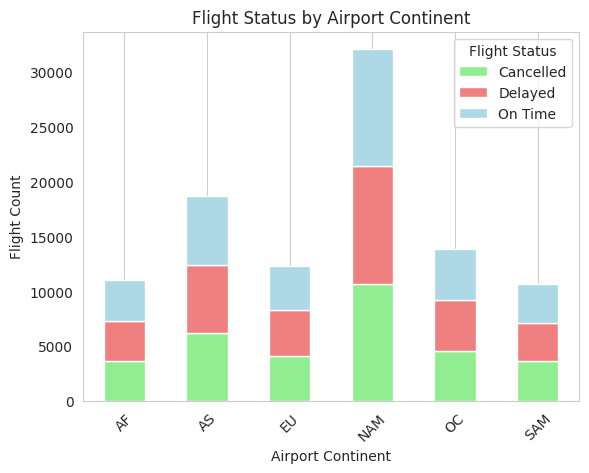

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
colors = {'On Time': 'lightgreen', 'Delayed': 'lightcoral', 'Cancelled': 'lightblue'}

plt.figure(figsize=(10, 6))
df.groupby(['Airport Continent', 'Flight Status']).size().unstack().plot(kind='bar', stacked=True, color=[colors[s] for s in df['Flight Status'].unique()])
plt.title('Flight Status by Airport Continent')
plt.xlabel('Airport Continent')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.grid(axis='y')
plt.show()


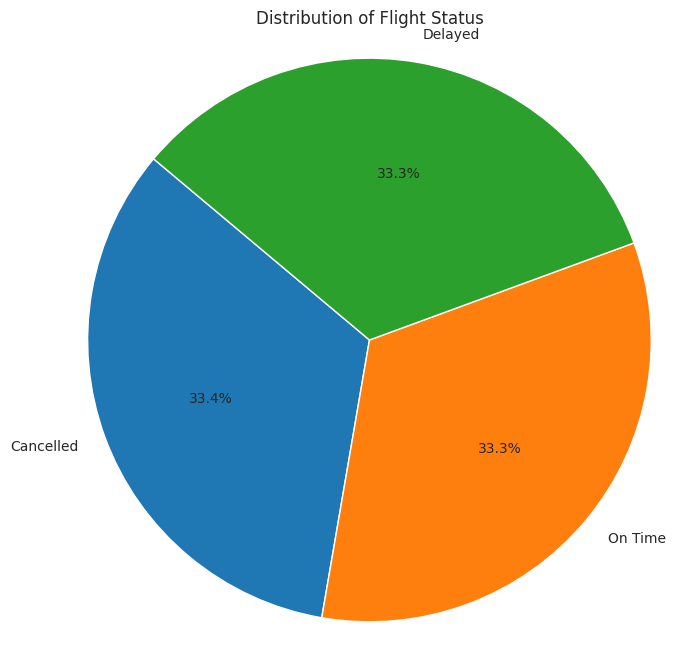

In [198]:
flight_status_counts = df['Flight Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(flight_status_counts, labels=flight_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flight Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

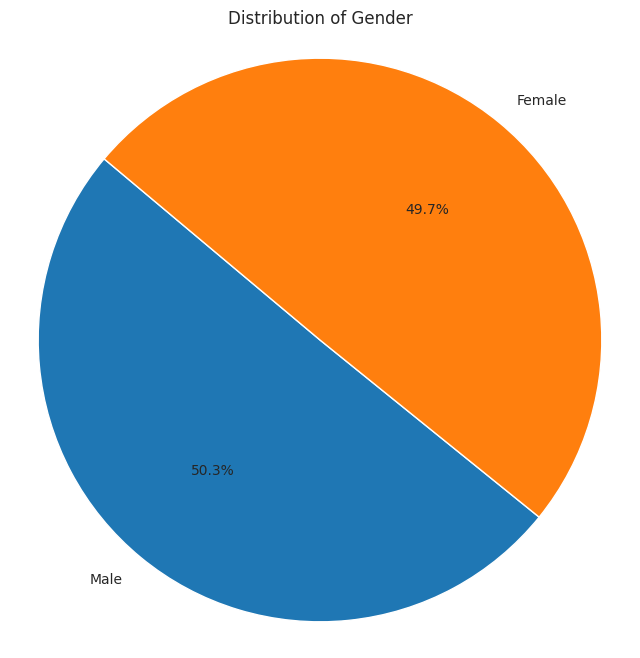

In [199]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

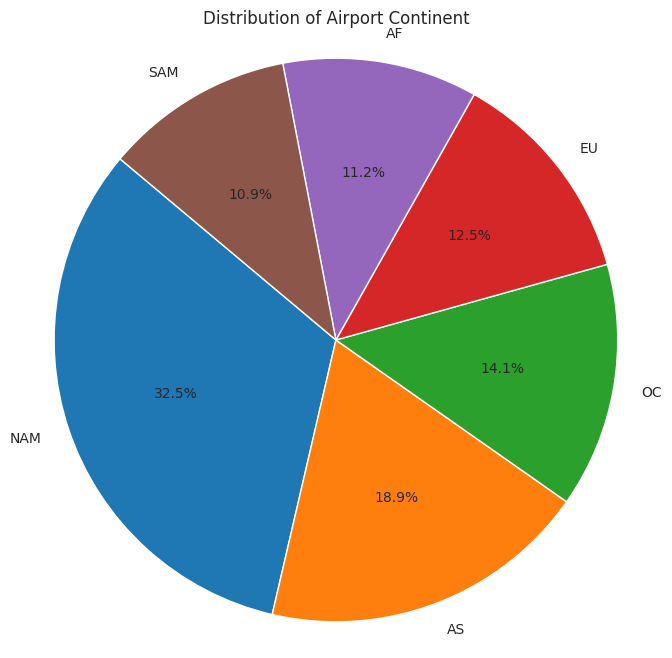

In [200]:
# Plotting pie chart for Airport Continent
continent_counts = df['Airport Continent'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airport Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

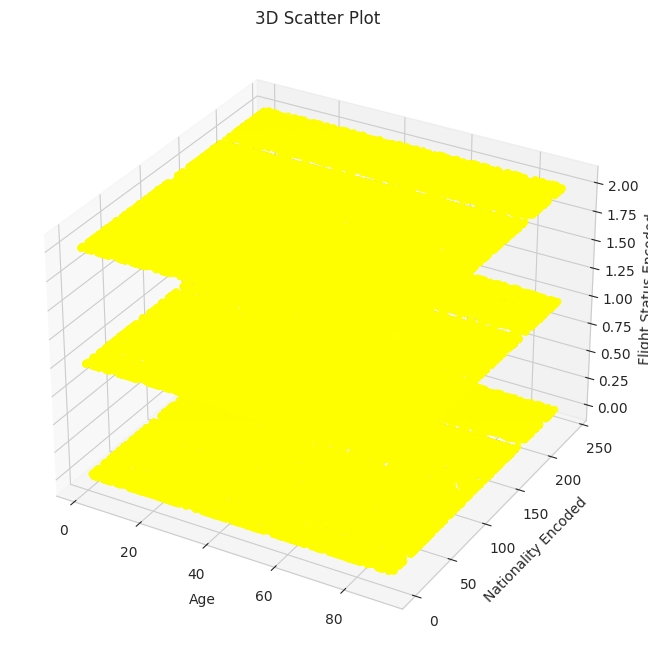

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# Encoding 'Nationality' using label encoding
label_encoder = LabelEncoder()
df['Nationality Encoded'] = label_encoder.fit_transform(df['Nationality'])

# Encoding 'Flight Status' using label encoding
df['Flight Status Encoded'] = label_encoder.fit_transform(df['Flight Status'])

# Assuming you have three numerical variables 'Age', 'Nationality Encoded', and 'Flight Status Encoded'
# Plotting a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Age'], df['Nationality Encoded'], df['Flight Status Encoded'], c='yellow', marker='o')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Nationality Encoded')
ax.set_zlabel('Flight Status Encoded')
plt.title('3D Scatter Plot')

plt.show()


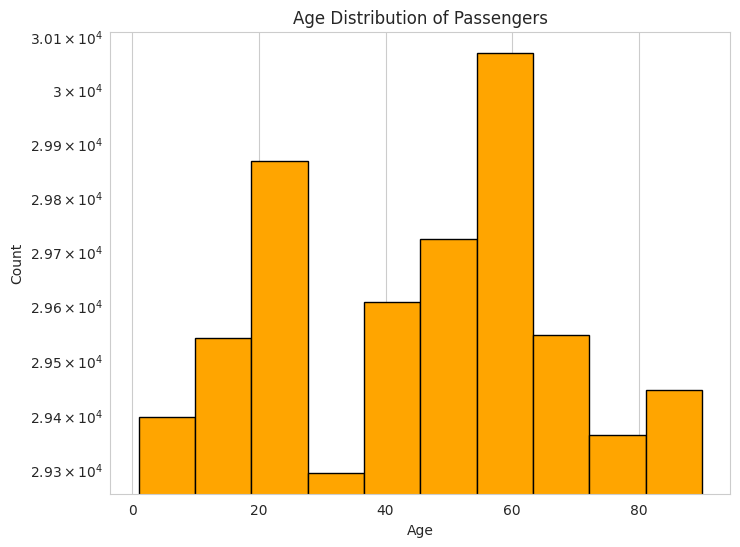

In [202]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='orange', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7b8c0cecaaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b8c0cee37f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7b8c0cecae30>],
 'medians': [<matplotlib.lines.Line2D at 0x7b8c0cee0c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b8c0cee00a0>],
 'means': []}

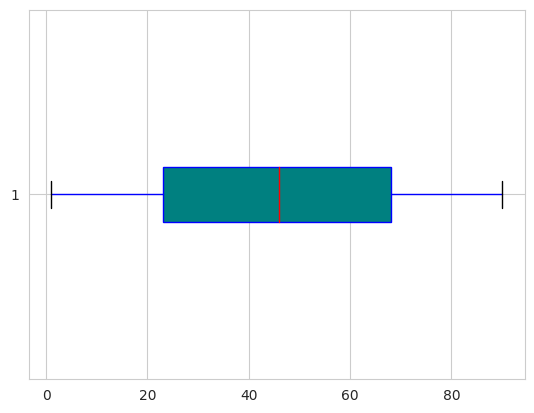

In [203]:
# Customizing colors
box_color = 'teal'
whisker_color = 'blue'
median_color = 'red'

plt.boxplot(df['Age'], vert=False, patch_artist=True,
            boxprops=dict(facecolor=box_color, color=whisker_color),
            whiskerprops=dict(color=whisker_color),
            medianprops=dict(color=median_color))

<Figure size 800x600 with 0 Axes>

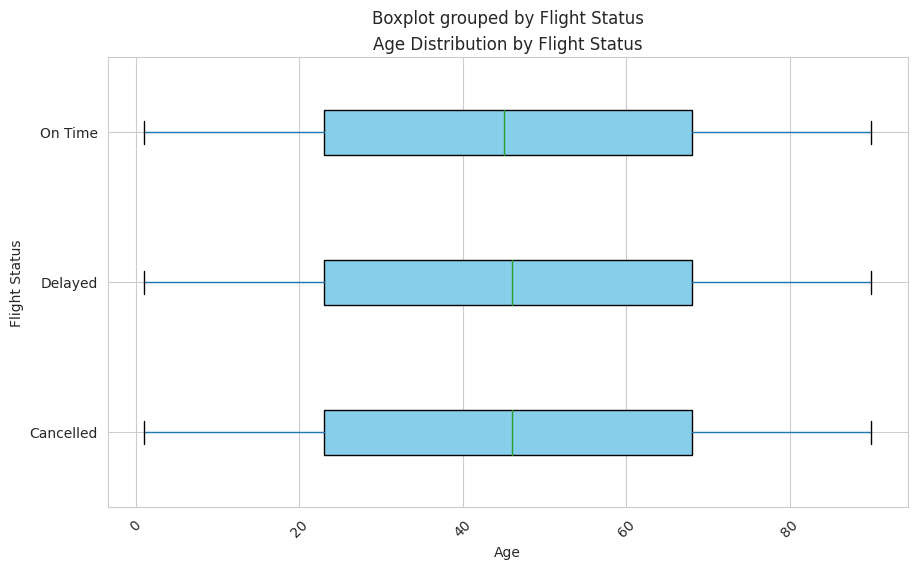

In [204]:
# Box plot for Flight Status
plt.figure(figsize=(8, 6))
flight_status_order = ['On Time', 'Delayed', 'Cancelled']
df.boxplot(column='Age', by='Flight Status', vert=False, grid=True, figsize=(10, 6), patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Age Distribution by Flight Status')
plt.xlabel('Age')
plt.ylabel('Flight Status')
plt.xticks(rotation=45)
plt.show()

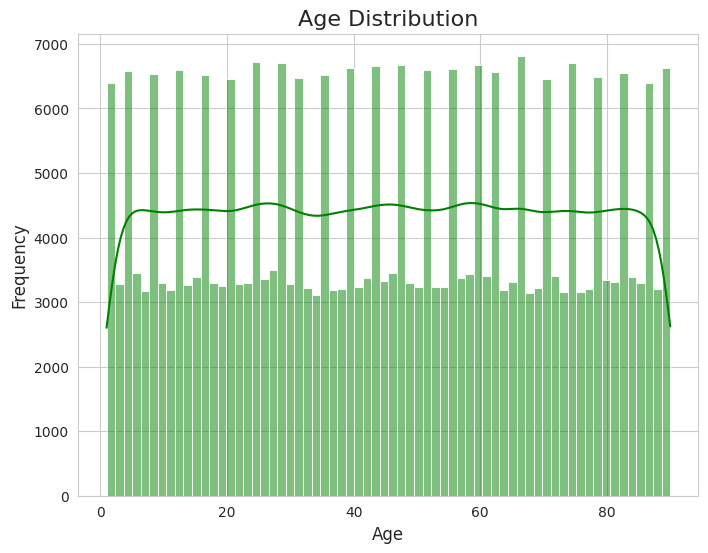

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Plot histogram with beautiful color
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, color='green')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


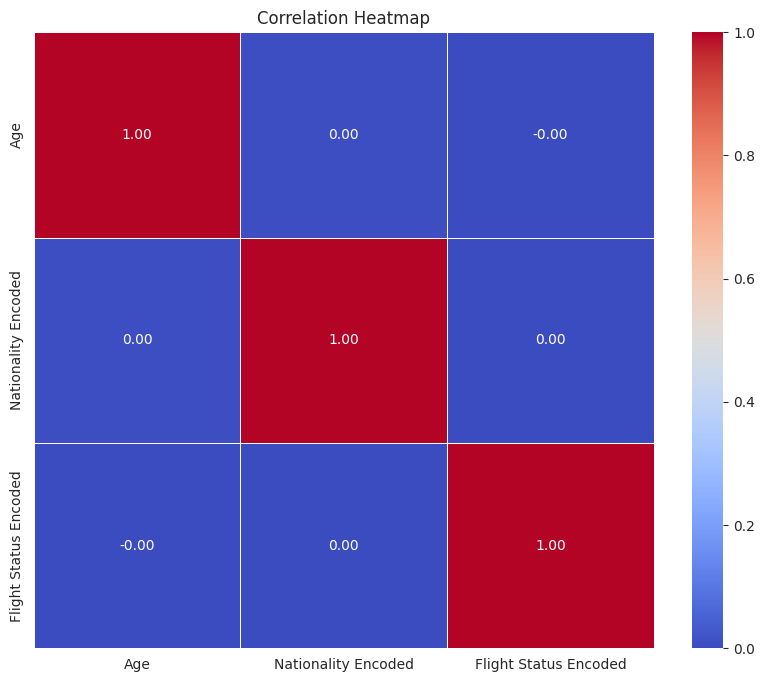

In [206]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-207-a7d0d9826172>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




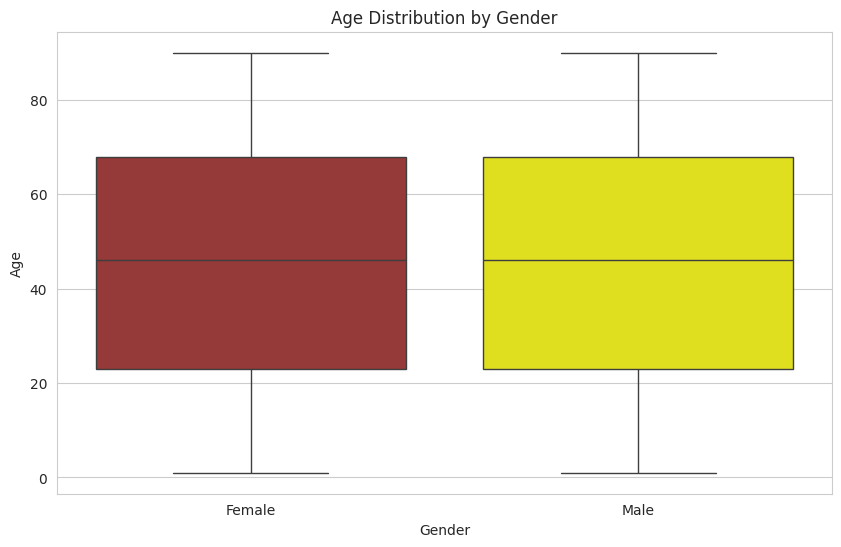

In [207]:

# Boxplot for Age distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age' , palette=['brown' , 'yellow'])
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


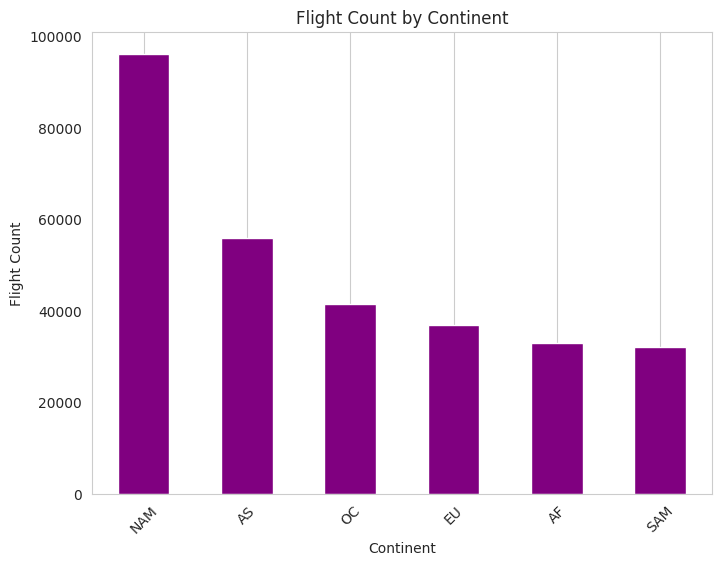

In [208]:
flight_count_by_continent = df['Airport Continent'].value_counts()

# Plot flight count by continent
plt.figure(figsize=(8, 6))
flight_count_by_continent.plot(kind='bar', color='purple')
plt.title('Flight Count by Continent')
plt.xlabel('Continent')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

                 Age
count  295857.000000
mean       45.504021
std        25.929761
min         1.000000
25%        23.000000
50%        46.000000
75%        68.000000
max        90.000000
Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


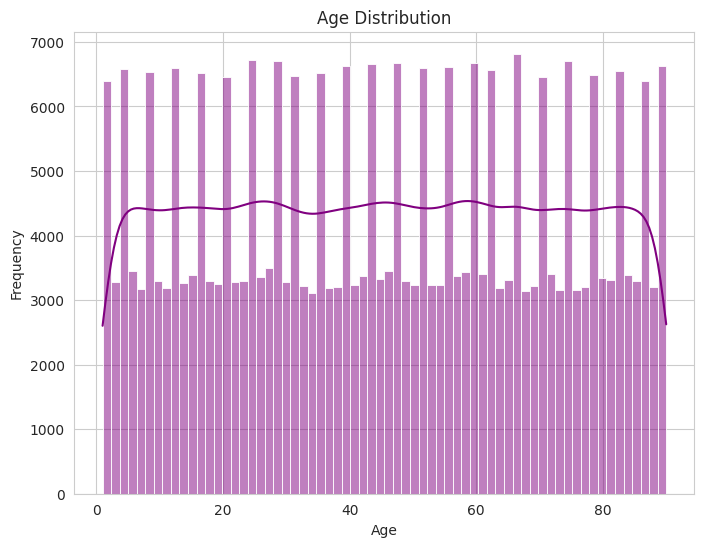

<ipython-input-209-b26f197b9b8d>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




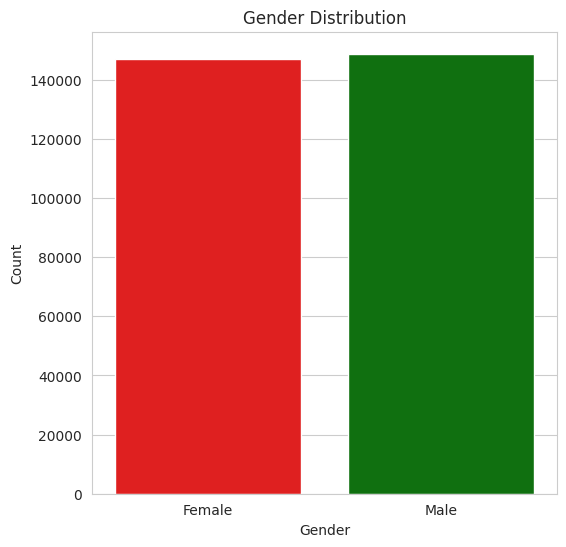

<ipython-input-209-b26f197b9b8d>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




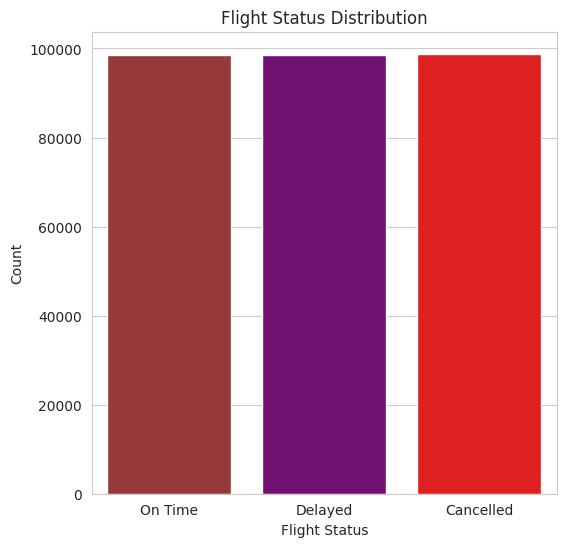

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Set style
sns.set_style("whitegrid")

# Define custom color
color = 'purple'

# Plot histogram with the specified color
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True, color=color)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender' , palette=['red' , 'green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Flight status distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Flight Status' , palette=['brown' , 'purple' , 'red'])
plt.title('Flight Status Distribution')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()


<ipython-input-210-90f71c612bc1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




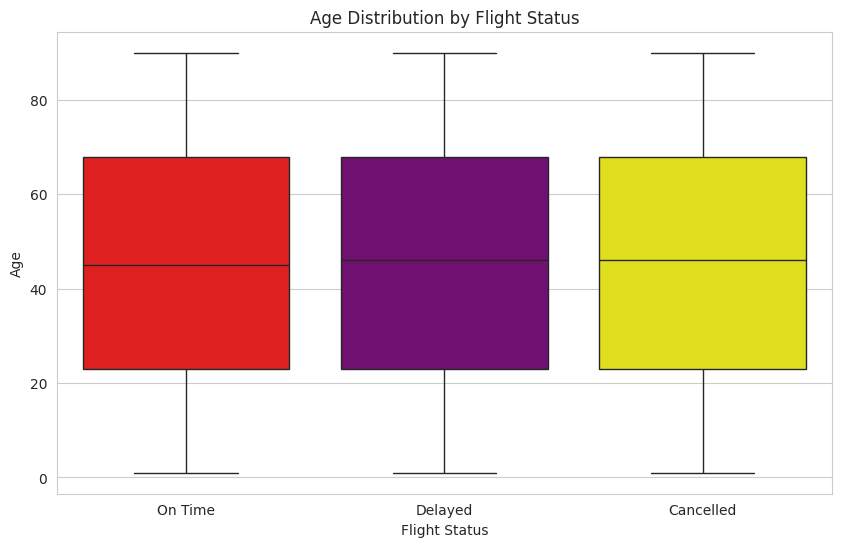

In [210]:
# Bivariate Analysis
# Age vs. Flight Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flight Status', y='Age', data=df , palette=['red' , 'purple' , 'yellow'])
plt.title('Age Distribution by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Age')
plt.show()



  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   

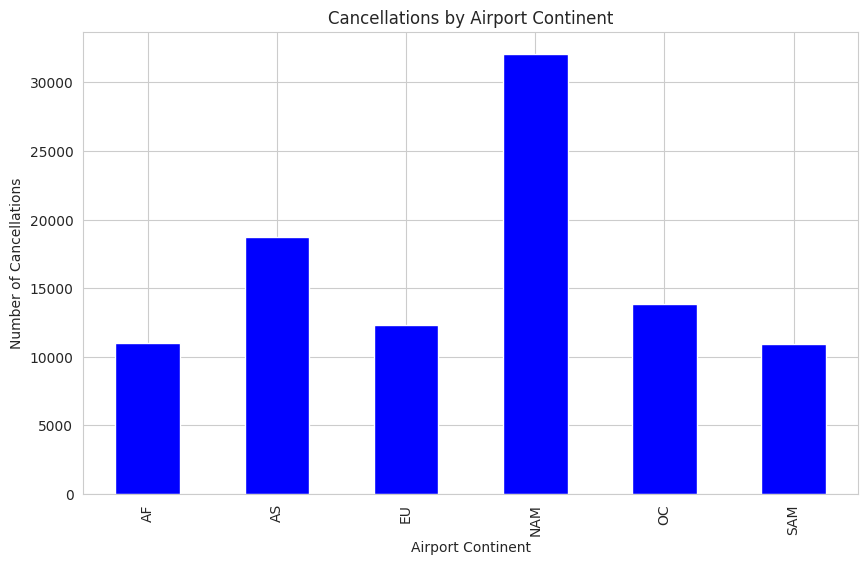

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# Let's first examine the structure of the dataset
print(df.head())

# Now, let's proceed with the visualizations



# 2. Cancellations by Airport Continent
cancelled_by_continent = df[df['Flight Status'] == 'Cancelled'].groupby('Airport Continent').size()
cancelled_by_continent.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Cancellations by Airport Continent')
plt.xlabel('Airport Continent')
plt.ylabel('Number of Cancellations')
plt.show()






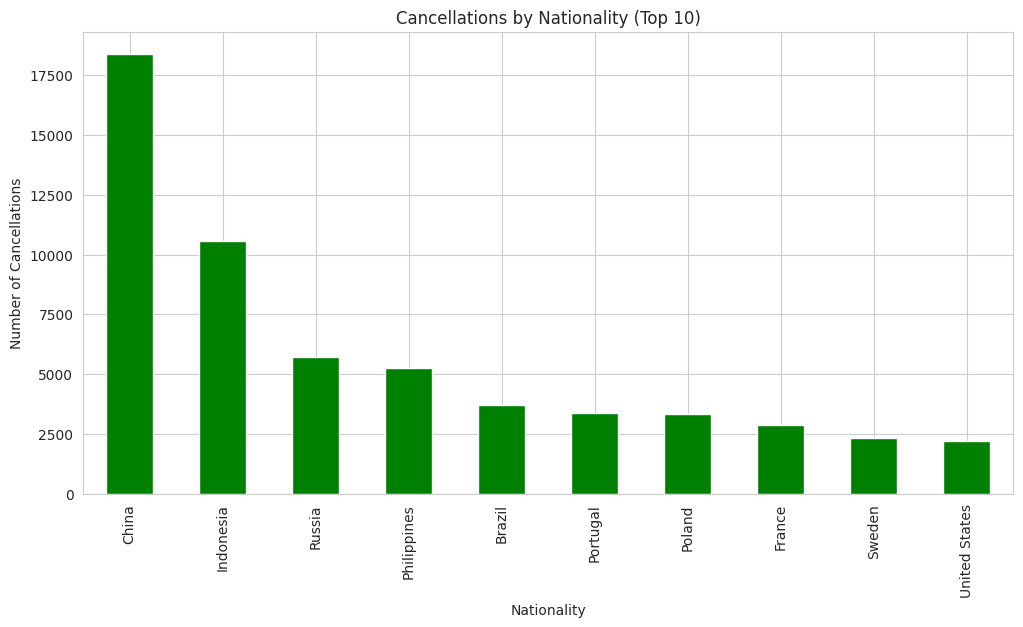

In [212]:
# 3. Cancellations by Nationality
cancelled_by_nationality = df[df['Flight Status'] == 'Cancelled'].groupby('Nationality').size().nlargest(10)
cancelled_by_nationality.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Cancellations by Nationality (Top 10)')
plt.xlabel('Nationality')
plt.ylabel('Number of Cancellations')
plt.show()

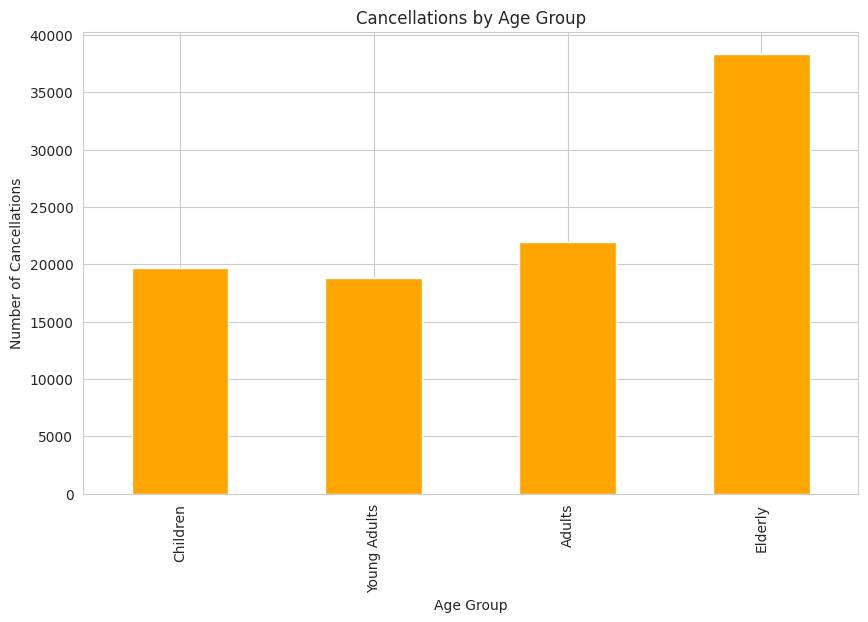

In [213]:
# 4. Cancellations by Age Group
# Assuming age groups are predefined
age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 55, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])
cancelled_by_age_group = df[df['Flight Status'] == 'Cancelled'].groupby(age_groups).size()
cancelled_by_age_group.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Cancellations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cancellations')
plt.show()



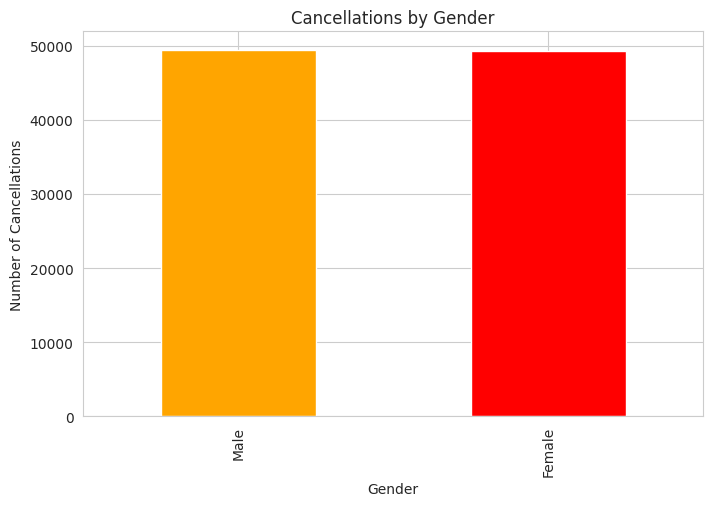

In [214]:
# 5. Cancellations by Gender
cancelled_by_gender = df[df['Flight Status'] == 'Cancelled']['Gender'].value_counts()
cancelled_by_gender.plot(kind='bar', figsize=(8, 5), color=['orange' , 'red'])
plt.title('Cancellations by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cancellations')
plt.show()



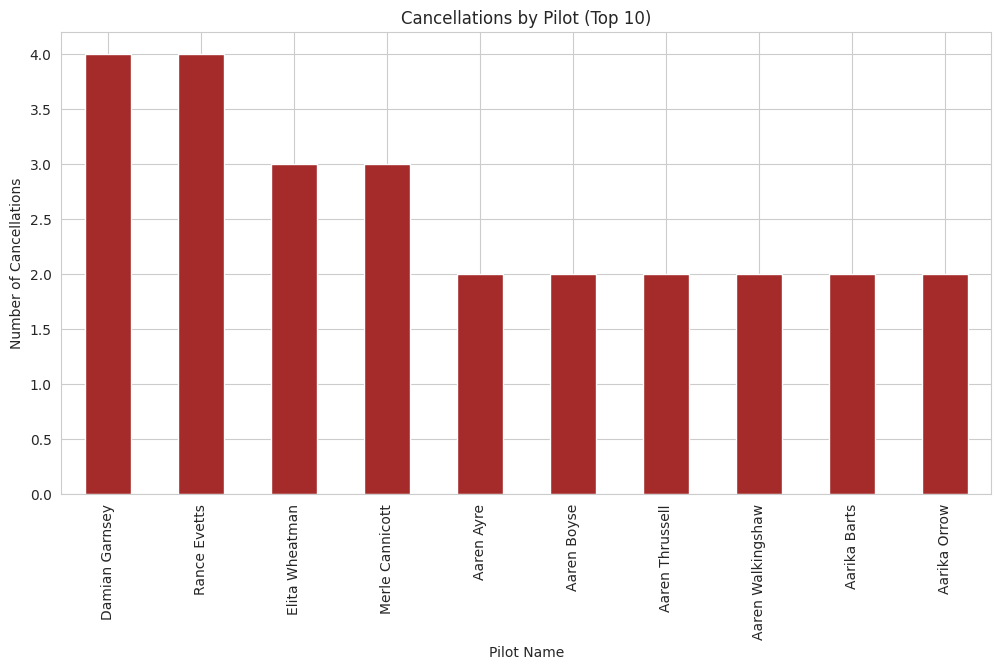

In [215]:
# 6. Cancellations by Pilot
# Assuming there's a 'Pilot Name' column in the DataFrame
cancelled_by_pilot = df[df['Flight Status'] == 'Cancelled'].groupby('Pilot Name').size().nlargest(10)
cancelled_by_pilot.plot(kind='bar', figsize=(12, 6), color='brown')
plt.title('Cancellations by Pilot (Top 10)')
plt.xlabel('Pilot Name')
plt.ylabel('Number of Cancellations')
plt.show()



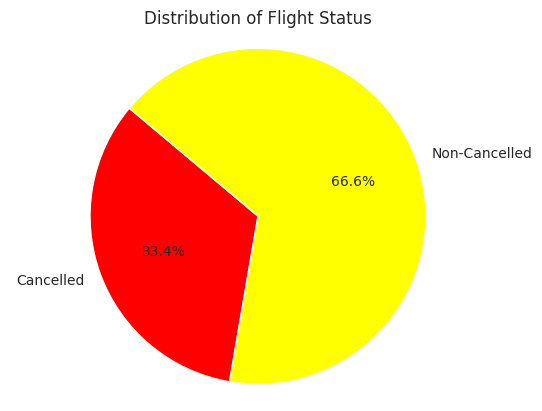

In [216]:
# 7. Cancellations by Flight Status
flight_status_counts = df['Flight Status'].value_counts()
cancelled_count = flight_status_counts['Cancelled']
non_cancelled_count = df.shape[0] - cancelled_count
labels = ['Cancelled', 'Non-Cancelled']
sizes = [cancelled_count, non_cancelled_count]
colors = ['red', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Flight Status')
plt.show()

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# Let's first examine the structure of the dataset
print(df.head())

# Now, let's proceed with the visualizations for on-time flights





  Passenger ID First Name Last Name  Gender  Age Nationality  \
0       ABVWIg     Edithe    Leggis  Female   62       Japan   
1       jkXXAX     Elwood      Catt    Male   62   Nicaragua   
2       CdUz2g      Darby   Felgate    Male   67      Russia   
3       BRS38V   Dominica      Pyle  Female   71       China   
4       9kvTLo        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             YCO   

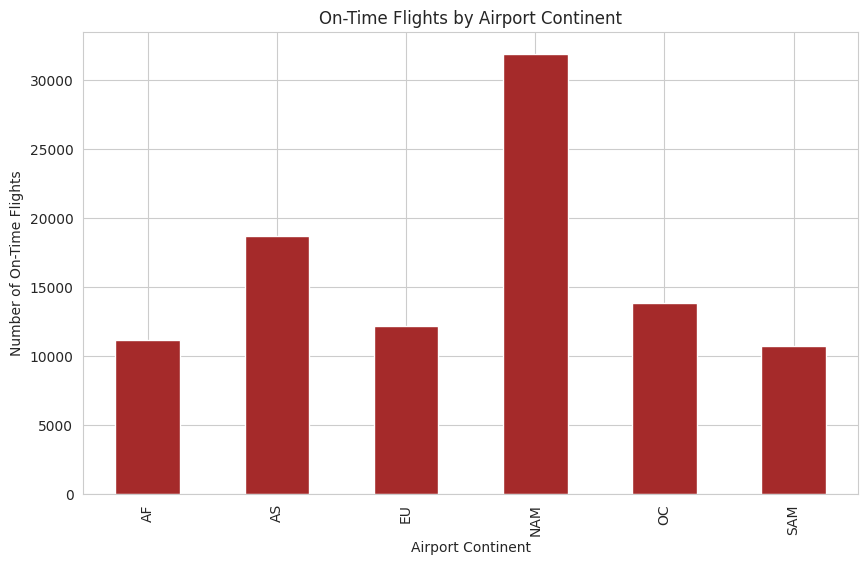

In [218]:
# 2. On-Time Flights by Airport Continent
ontime_by_continent = df[df['Flight Status'] == 'On Time'].groupby('Airport Continent').size()
ontime_by_continent.plot(kind='bar', figsize=(10, 6), color='brown')
plt.title('On-Time Flights by Airport Continent')
plt.xlabel('Airport Continent')
plt.ylabel('Number of On-Time Flights')
plt.show()



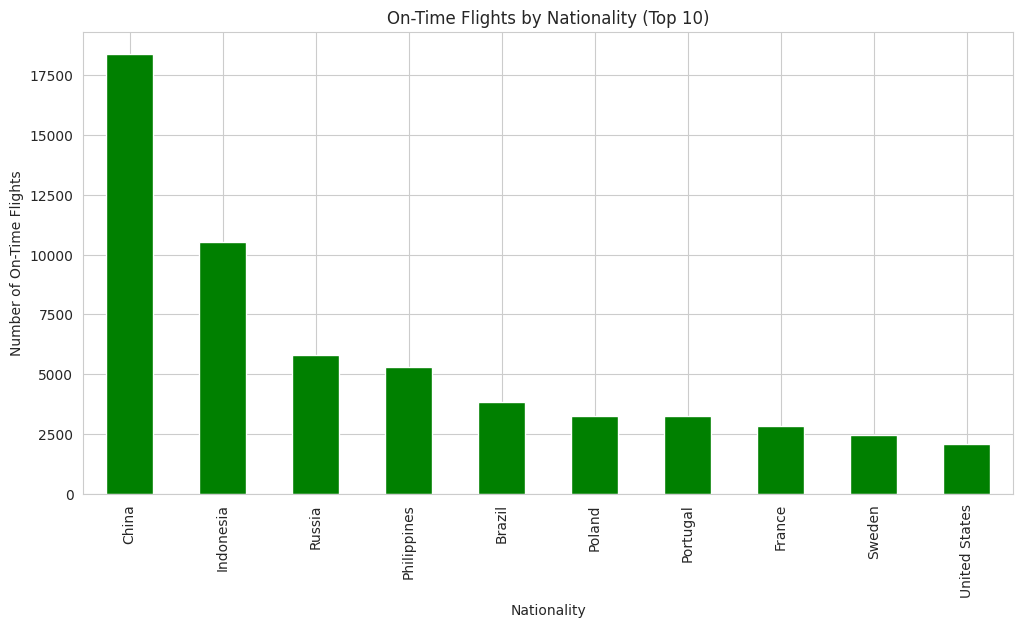

In [219]:
# 3. On-Time Flights by Nationality
ontime_by_nationality = df[df['Flight Status'] == 'On Time'].groupby('Nationality').size().nlargest(10)
ontime_by_nationality.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('On-Time Flights by Nationality (Top 10)')
plt.xlabel('Nationality')
plt.ylabel('Number of On-Time Flights')
plt.show()



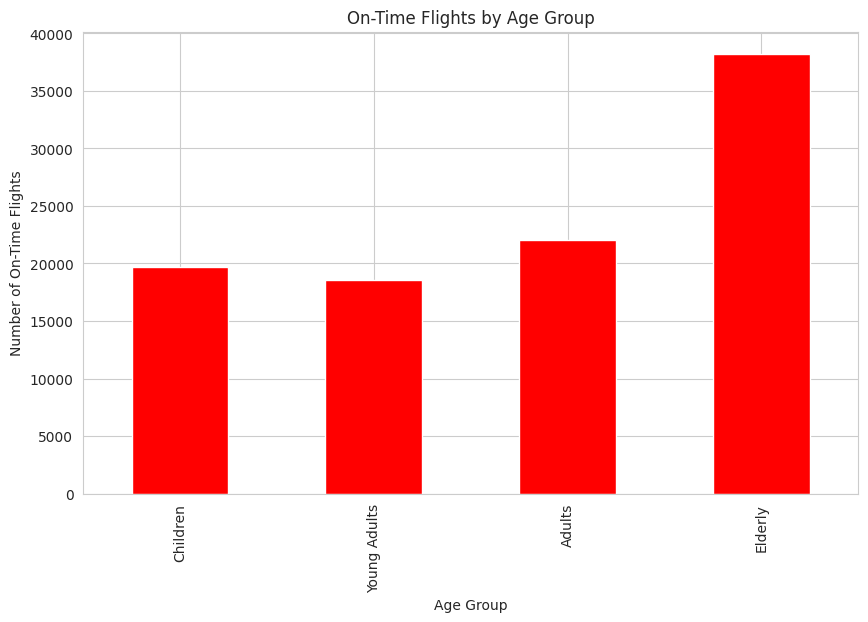

In [220]:
# 4. On-Time Flights by Age Group
# Assuming age groups are predefined
age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 55, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])
ontime_by_age_group = df[df['Flight Status'] == 'On Time'].groupby(age_groups).size()
ontime_by_age_group.plot(kind='bar', figsize=(10, 6), color=['red'])
plt.title('On-Time Flights by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of On-Time Flights')
plt.show()



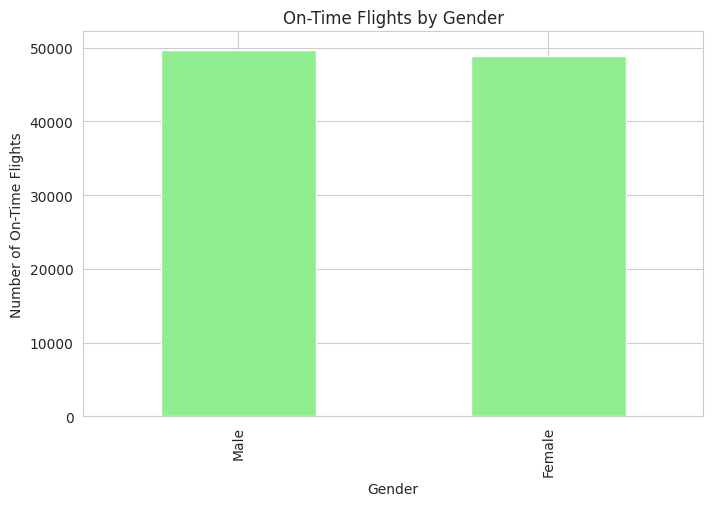

In [221]:
# 5. On-Time Flights by Gender
ontime_by_gender = df[df['Flight Status'] == 'On Time']['Gender'].value_counts()
ontime_by_gender.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('On-Time Flights by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of On-Time Flights')
plt.show()



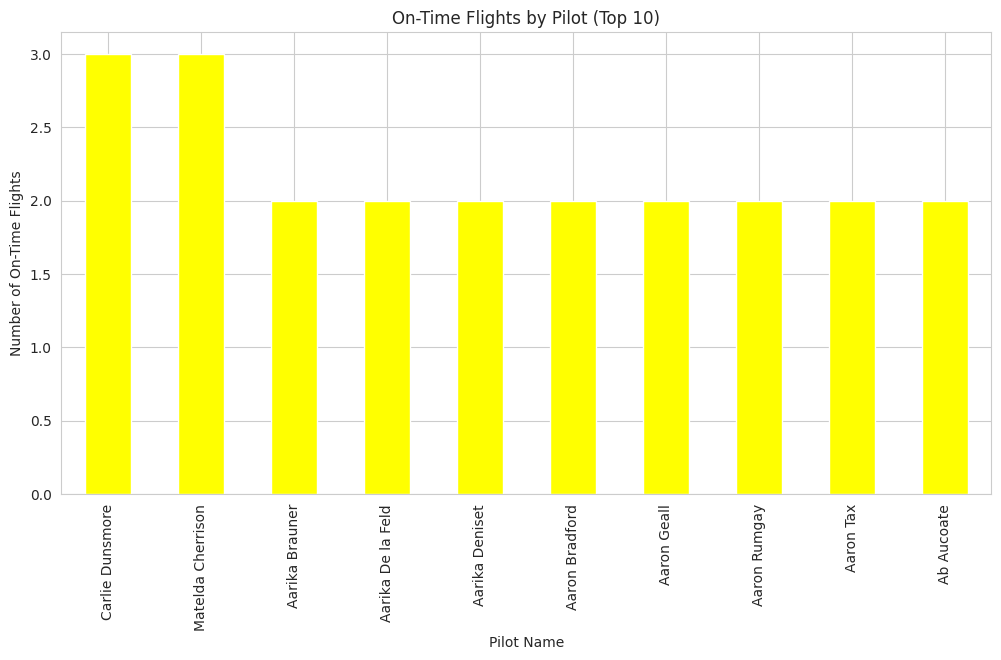

In [222]:
# 6. On-Time Flights by Pilot
# Assuming there's a 'Pilot Name' column in the DataFrame
ontime_by_pilot = df[df['Flight Status'] == 'On Time'].groupby('Pilot Name').size().nlargest(10)
ontime_by_pilot.plot(kind='bar', figsize=(12, 6), color='yellow')
plt.title('On-Time Flights by Pilot (Top 10)')
plt.xlabel('Pilot Name')
plt.ylabel('Number of On-Time Flights')
plt.show()



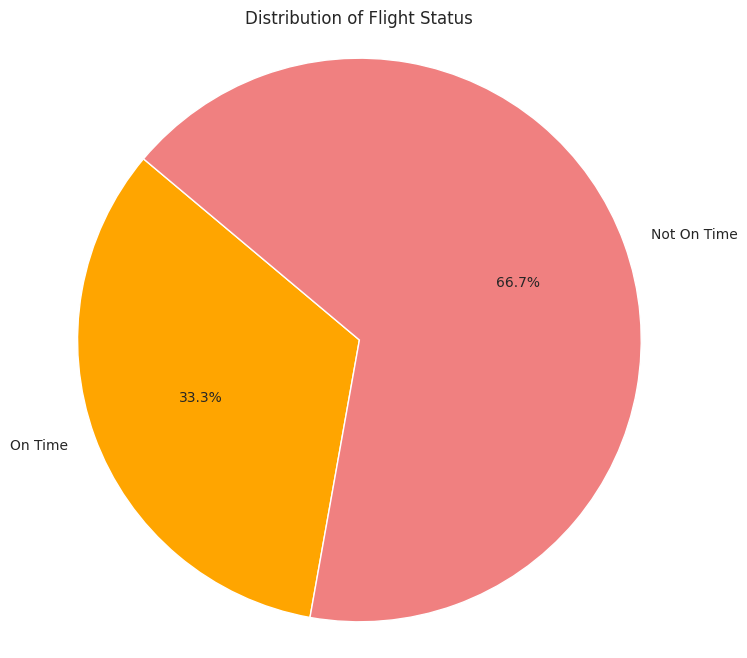

In [223]:
import matplotlib.pyplot as plt

# Calculate counts for 'On Time' and 'Not On Time'
on_time_count = df[df['Flight Status'] == 'On Time'].shape[0]
not_on_time_count = df[df['Flight Status'] != 'On Time'].shape[0]

# Create a pie chart
labels = ['On Time', 'Not On Time']
sizes = [on_time_count, not_on_time_count]
colors = ['orange', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flight Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


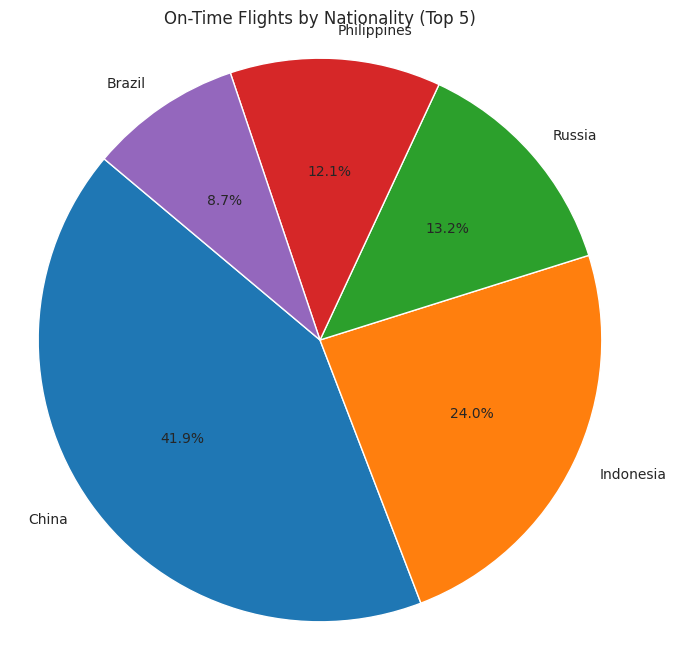

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# 1. On-Time Flights by Nationality (Pie Chart)
ontime_by_nationality = df[df['Flight Status'] == 'On Time'].groupby('Nationality').size().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(ontime_by_nationality, labels=ontime_by_nationality.index, autopct='%1.1f%%', startangle=140)
plt.title('On-Time Flights by Nationality (Top 5)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




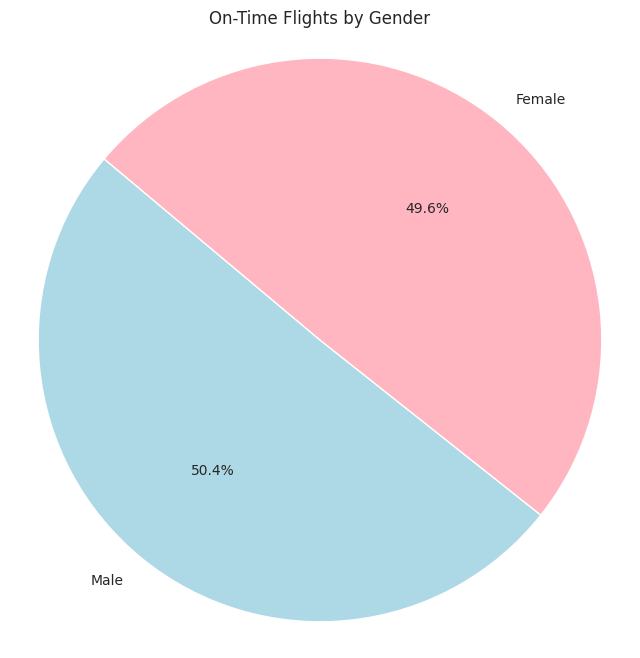

In [225]:
# 2. On-Time Flights by Gender (Pie Chart)
ontime_by_gender = df[df['Flight Status'] == 'On Time']['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ontime_by_gender, labels=ontime_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('On-Time Flights by Gender')
plt.axis('equal')
plt.show()

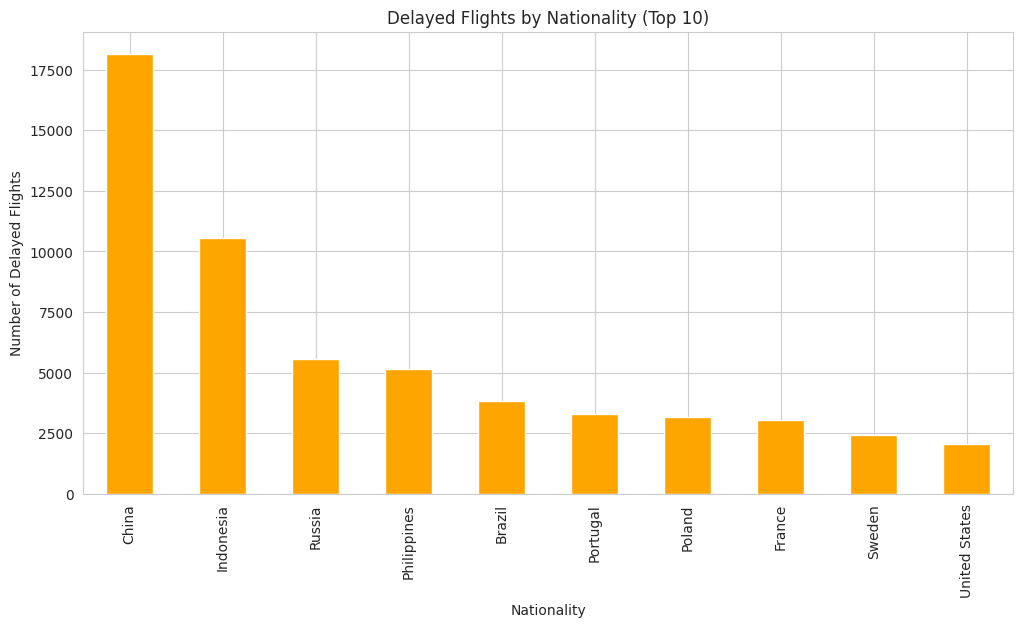

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# 1. Delayed Flights by Nationality (Bar Chart)
delayed_by_nationality = df[df['Flight Status'] == 'Delayed'].groupby('Nationality').size().nlargest(10)
delayed_by_nationality.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Delayed Flights by Nationality (Top 10)')
plt.xlabel('Nationality')
plt.ylabel('Number of Delayed Flights')
plt.show()



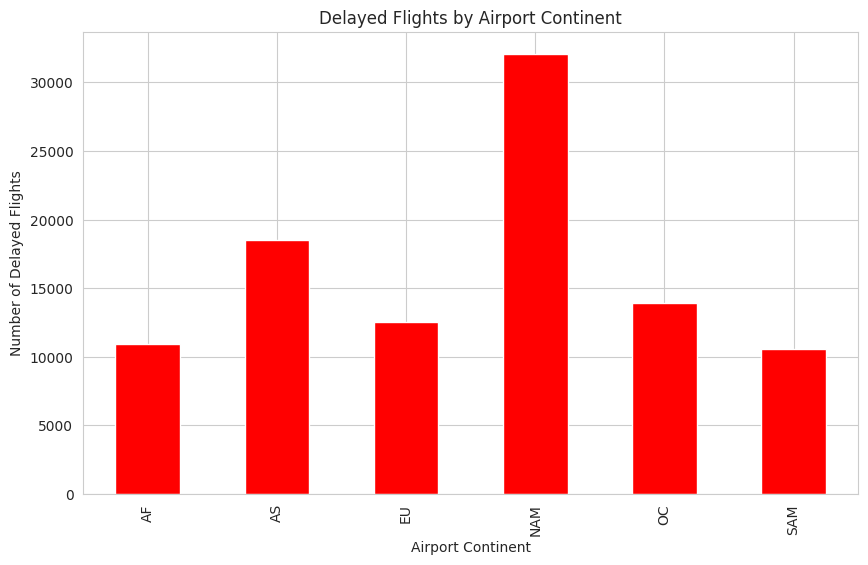

In [227]:
# 2. Delayed Flights by Airport Continent (Bar Chart)
delayed_by_continent = df[df['Flight Status'] == 'Delayed'].groupby('Airport Continent').size()
delayed_by_continent.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Delayed Flights by Airport Continent')
plt.xlabel('Airport Continent')
plt.ylabel('Number of Delayed Flights')
plt.show()




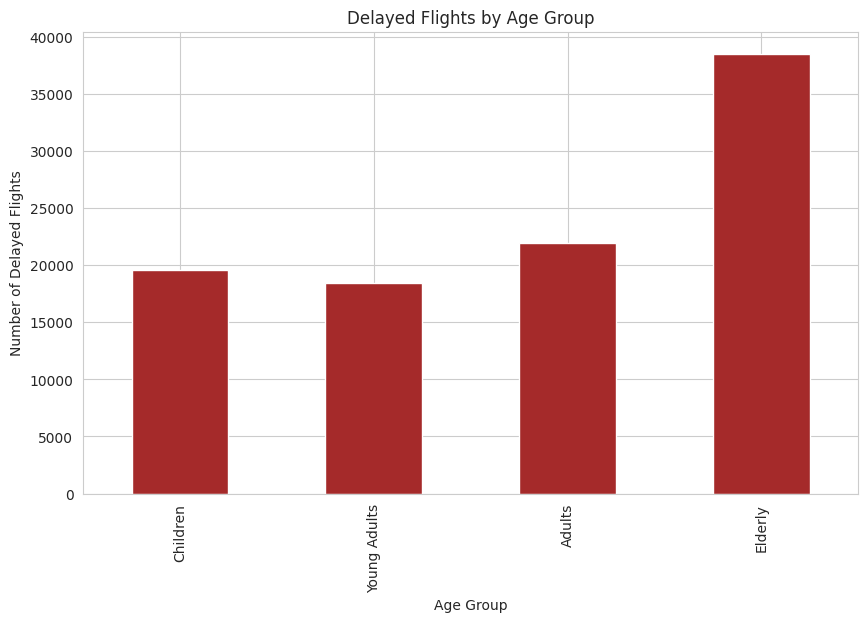

In [228]:
# 3. Delayed Flights by Age Group (Bar Chart)
# Assuming age groups are predefined
age_groups = pd.cut(df[df['Flight Status'] == 'Delayed']['Age'], bins=[0, 18, 35, 55, 100], labels=['Children', 'Young Adults', 'Adults', 'Elderly'])
delayed_by_age_group = df[df['Flight Status'] == 'Delayed'].groupby(age_groups).size()
delayed_by_age_group.plot(kind='bar', figsize=(10, 6), color='brown')
plt.title('Delayed Flights by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Delayed Flights')
plt.show()



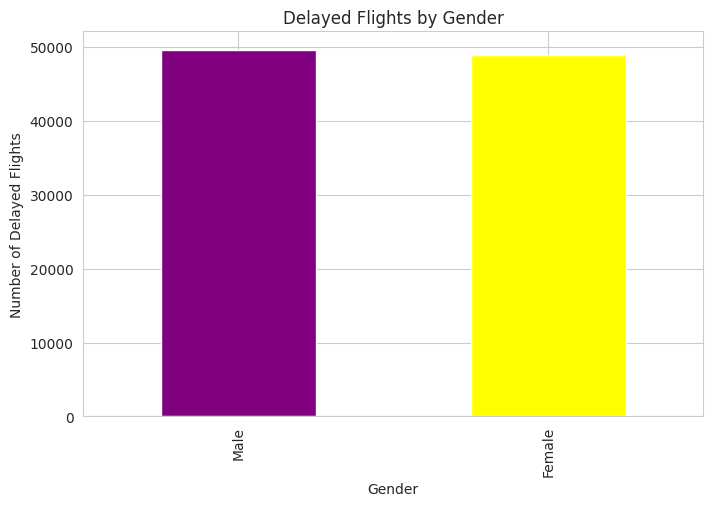

In [229]:
# 4. Delayed Flights by Gender (Bar Chart)
delayed_by_gender = df[df['Flight Status'] == 'Delayed']['Gender'].value_counts()
delayed_by_gender.plot(kind='bar', figsize=(8, 5), color=['purple' , 'yellow'])
plt.title('Delayed Flights by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Delayed Flights')
plt.show()



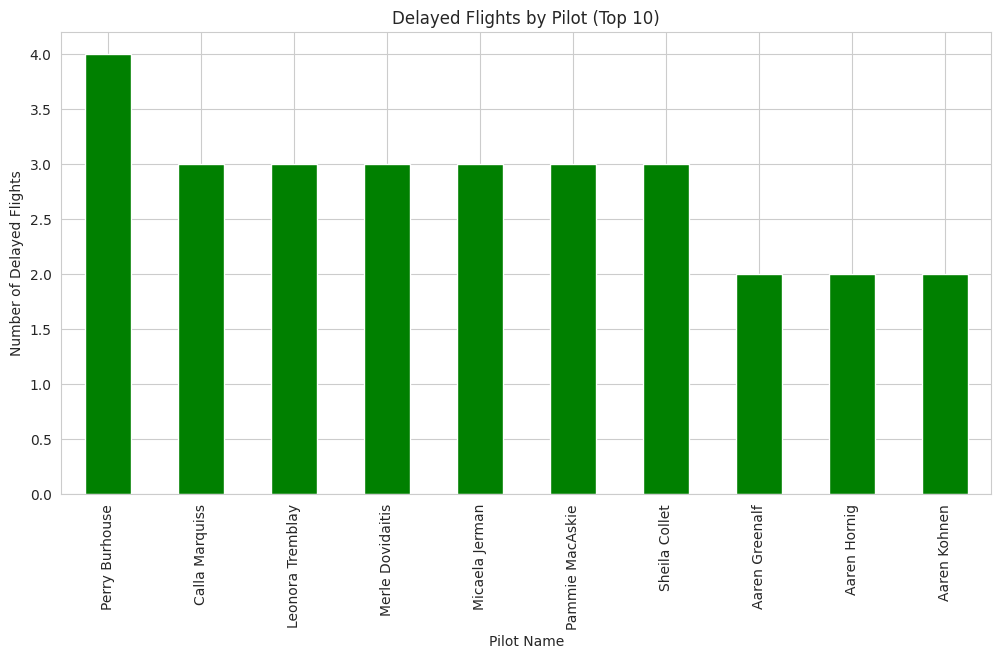

In [230]:
# 5. Delayed Flights by Pilot (Bar Chart)
# Assuming there's a 'Pilot Name' column in the DataFrame
delayed_by_pilot = df[df['Flight Status'] == 'Delayed'].groupby('Pilot Name').size().nlargest(10)
delayed_by_pilot.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Delayed Flights by Pilot (Top 10)')
plt.xlabel('Pilot Name')
plt.ylabel('Number of Delayed Flights')
plt.show()



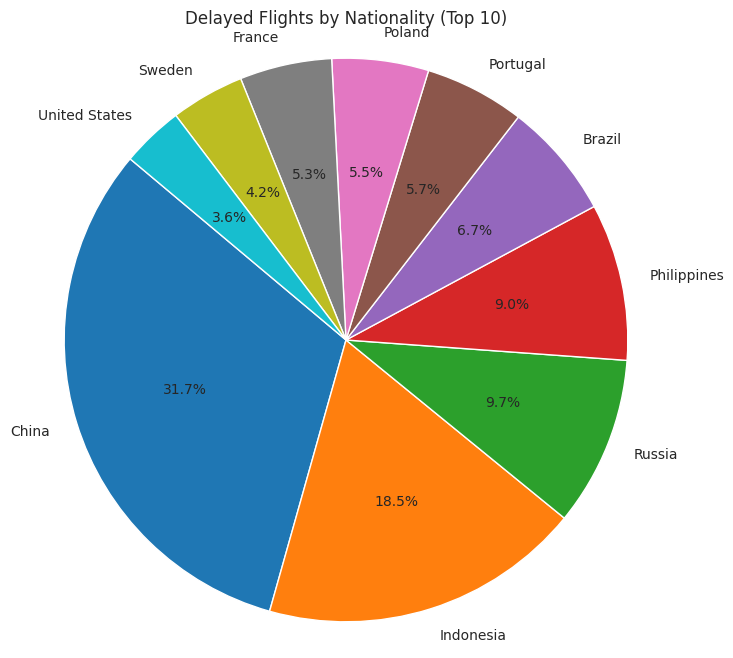

In [231]:
# 6. Delayed Flights by Nationality (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(delayed_by_nationality, labels=delayed_by_nationality.index, autopct='%1.1f%%', startangle=140)
plt.title('Delayed Flights by Nationality (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



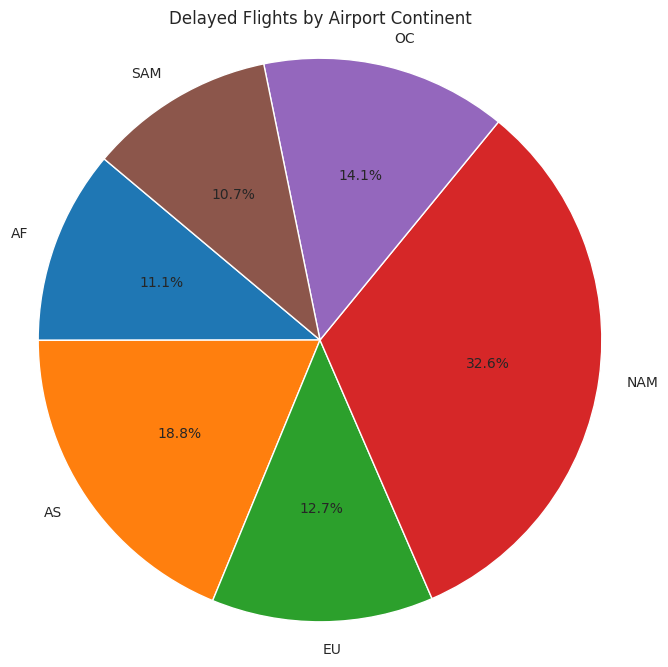

In [232]:
# 7. Delayed Flights by Airport Continent (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(delayed_by_continent, labels=delayed_by_continent.index, autopct='%1.1f%%', startangle=140)
plt.title('Delayed Flights by Airport Continent')
plt.axis('equal')
plt.show()



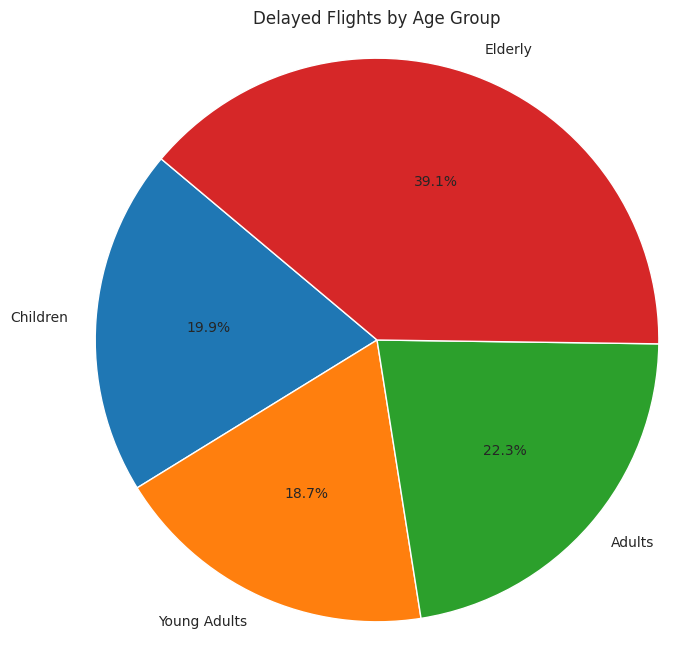

In [233]:
# 8. Delayed Flights by Age Group (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(delayed_by_age_group, labels=delayed_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Delayed Flights by Age Group')
plt.axis('equal')
plt.show()



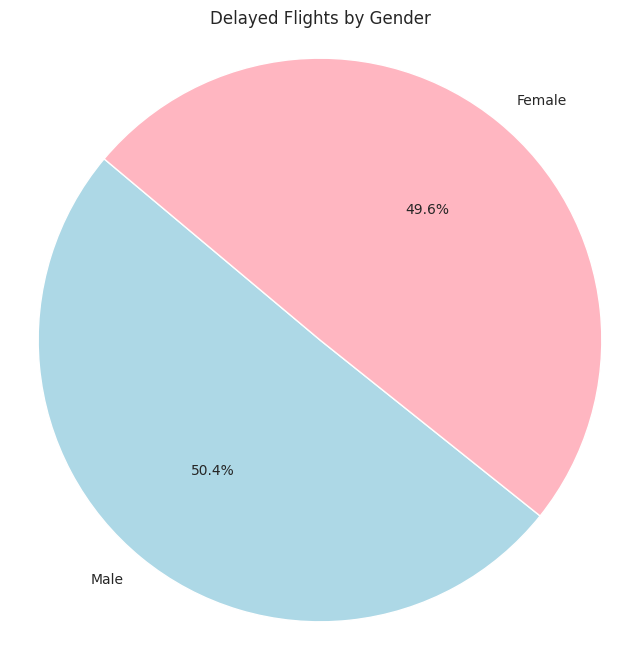

In [234]:
# 9. Delayed Flights by Gender (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(delayed_by_gender, labels=delayed_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Delayed Flights by Gender')
plt.axis('equal')
plt.show()

<ipython-input-235-94dc8a59ad14>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




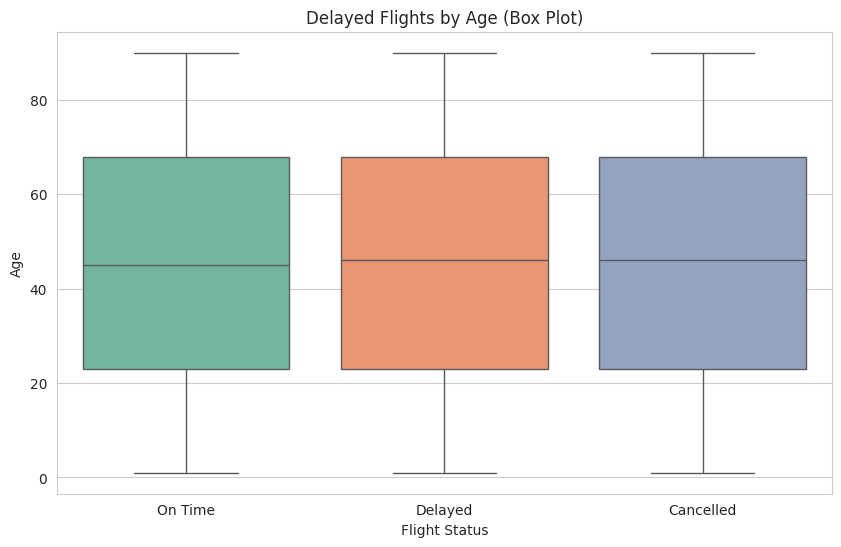

In [235]:
# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
df = merged_data

# 1. Delayed Flights by Age (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flight Status', y='Age', data=df, palette='Set2')
plt.title('Delayed Flights by Age (Box Plot)')
plt.xlabel('Flight Status')
plt.ylabel('Age')
plt.show()




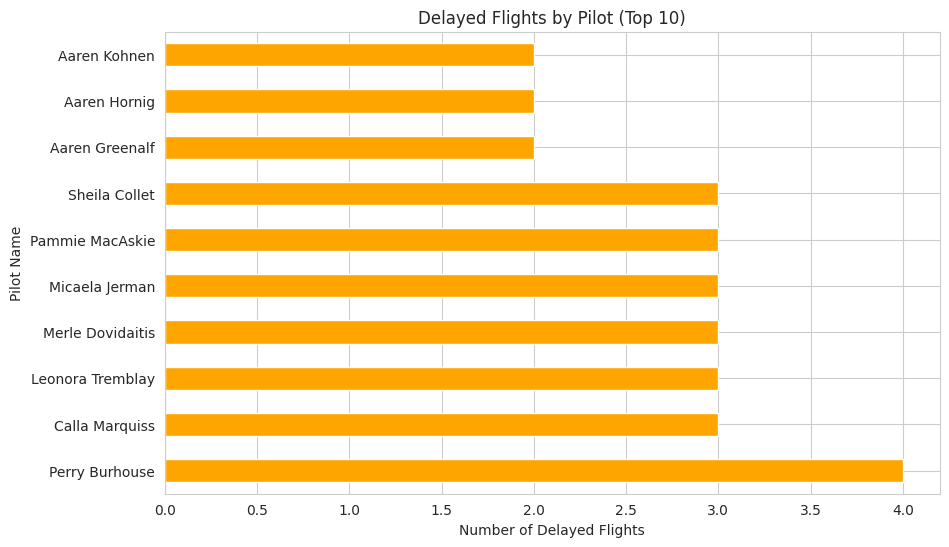

In [236]:

# 5. Delayed Flights by Pilot (Horizontal Bar Chart)
delayed_by_pilot = df[df['Flight Status'] == 'Delayed'].groupby('Pilot Name').size().nlargest(10)
delayed_by_pilot.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Delayed Flights by Pilot (Top 10)')
plt.xlabel('Number of Delayed Flights')
plt.ylabel('Pilot Name')
plt.show()

In [237]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [238]:
df = pd.get_dummies(df, columns=['Gender', 'Nationality','Flight Status'])
df.head()

,Passenger ID,First Name,Last Name,Age,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,...,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wallis and Futuna,Nationality_Western Sahara,Nationality_Yemen,Nationality_Zambia,Nationality_Zimbabwe,Flight Status_Cancelled,Flight Status_Delayed,Flight Status_On Time
0,ABVWIg,Edithe,Leggis,62,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,...,False,False,False,False,False,False,False,False,False,True
1,jkXXAX,Elwood,Catt,62,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,...,False,False,False,False,False,False,False,False,False,True
2,CdUz2g,Darby,Felgate,67,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,...,False,False,False,False,False,False,False,False,False,True
3,BRS38V,Dominica,Pyle,71,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,...,False,False,False,False,False,False,False,False,True,False
4,9kvTLo,Bay,Pencost,21,Gillespie Field,US,United States,NAM,North America,2/25/2022,...,False,False,False,False,False,False,False,False,False,True


In [239]:
import pandas as pd
df = pd.read_csv("Airline Dataset Updated - v2.csv")
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [240]:
df = df.dropna()
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df['Month'] = df['Departure Date'].dt.month
df['Day'] = df['Departure Date'].dt.day
df['Year'] = df['Departure Date'].dt.year
columns_to_keep = [
    'Gender', 'Age', 'Nationality', 'Airport Name', 'Country Name',
    'Continents', 'Arrival Airport', 'Flight Status', 'Month', 'Day'
]
df = df[columns_to_keep]
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


In [241]:
dep = 'label'

# Set the label as 1 for 'On Time' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'On Time', dep] = 1

# Set the label as 2 for 'Delayed' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'Delayed', dep] = 0

# Set the label as 3 for 'Cancelled' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'Cancelled', dep] = 0
df.head()
features_to_encode = ["Gender", "Nationality", "Airport Name"]

# One-hot encode only the specified features
df_encoded = pd.get_dummies(df, columns=features_to_encode, prefix=features_to_encode)

# Concatenate the one-hot encoded DataFrame with the remaining columns
df_combined = pd.concat([df_encoded, df.drop(columns=features_to_encode)], axis=1)


In [242]:
df_combined.head()

,Age,Country Name,Continents,Arrival Airport,Flight Status,Month,Day,label,Gender_Female,Gender_Male,...,Airport Name_Žabljak Airport,Airport Name_Žilina Airport,Age,Country Name,Continents,Arrival Airport,Flight Status,Month,Day,label
0,62,United States,North America,CXF,On Time,6.0,28.0,1.0,True,False,...,False,False,62,United States,North America,CXF,On Time,6.0,28.0,1.0
1,62,Canada,North America,YCO,On Time,12.0,26.0,1.0,False,True,...,False,False,62,Canada,North America,YCO,On Time,12.0,26.0,1.0
2,67,France,Europe,GNB,On Time,1.0,18.0,1.0,False,True,...,False,False,67,France,Europe,GNB,On Time,1.0,18.0,1.0
3,71,Canada,North America,YND,Delayed,9.0,16.0,0.0,True,False,...,False,False,71,Canada,North America,YND,Delayed,9.0,16.0,0.0
4,21,United States,North America,SEE,On Time,2.0,25.0,1.0,False,True,...,False,False,21,United States,North America,SEE,On Time,2.0,25.0,1.0


In [243]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [244]:
# Load the datasets
df = pd.read_csv("Airline Dataset Updated - v2.csv")
data = pd.read_csv("Airline Dataset.csv")
data1 = pd.read_csv("Airline Dataset Updated.csv")

# Merge dataframes
merged_data = pd.concat([df, data, data1], ignore_index=True)
combined_data = merged_data


In [245]:
# Drop any duplicate rows
combined_data = combined_data.drop_duplicates()
combined_data = combined_data.dropna()
# Assuming 'Flight Status' is the target variable
X = combined_data.drop(columns=['Flight Status'])
y = combined_data['Flight Status']

# Convert object (string) columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}


Random Forest Classifier:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.92      0.93      0.93     19693
     Delayed       0.93      0.93      0.93     19790
     On Time       0.93      0.92      0.93     19689

    accuracy                           0.93     59172
   macro avg       0.93      0.93      0.93     59172
weighted avg       0.93      0.93      0.93     59172

Random Forest Feature Importances:
Last Name               0.110761
First Name              0.105120
Airport Name            0.101885
Arrival Airport         0.101002
Departure Date          0.098465
Age                     0.093950
Nationality             0.079792
Pilot Name              0.079375
Passenger ID            0.079058
Airport Country Code    0.045797
Country Name            0.045518
Airport Continent       0.021032
Continents              0.021009
Gender                  0.017237
dtype: float64


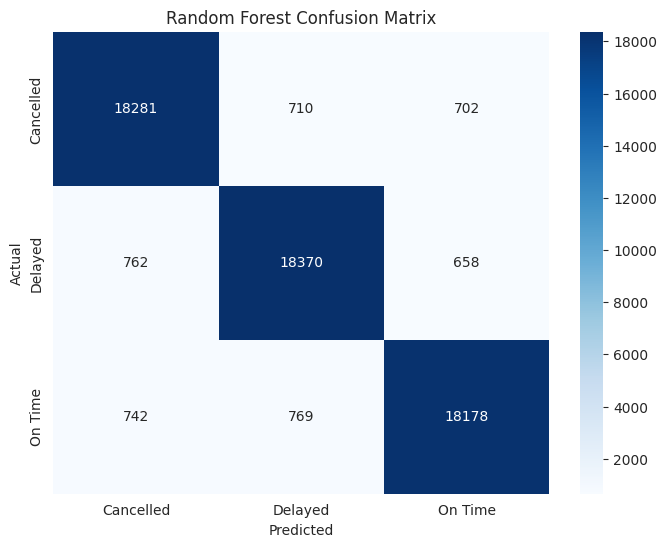


Decision Tree Classifier:
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.85      0.84      0.85     19693
     Delayed       0.84      0.85      0.85     19790
     On Time       0.84      0.84      0.84     19689

    accuracy                           0.85     59172
   macro avg       0.85      0.85      0.85     59172
weighted avg       0.85      0.85      0.85     59172

Decision Tree Feature Importances:
Last Name               0.140122
First Name              0.133772
Airport Name            0.115949
Arrival Airport         0.115066
Age                     0.106708
Departure Date          0.099638
Nationality             0.090779
Airport Country Code    0.040661
Passenger ID            0.040250
Country Name            0.039939
Pilot Name              0.027109
Gender                  0.016950
Airport Continent       0.016879
Continents              0.016178
dtype: float64


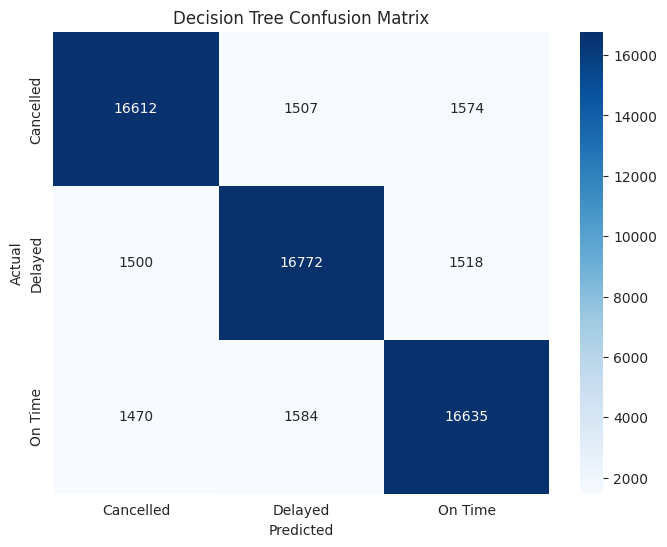


KNN Classifier:
Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.34      0.46      0.39     19693
     Delayed       0.34      0.34      0.34     19790
     On Time       0.34      0.22      0.27     19689

    accuracy                           0.34     59172
   macro avg       0.34      0.34      0.33     59172
weighted avg       0.34      0.34      0.33     59172



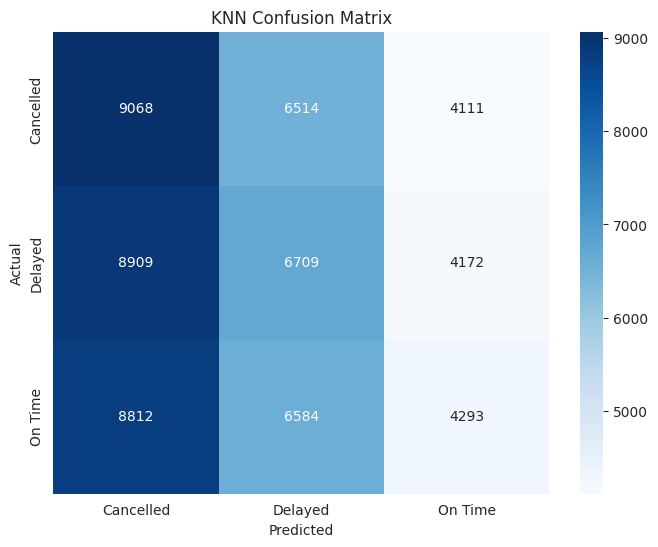


Logistic Regression Classifier:
Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.33      0.56      0.42     19693
     Delayed       0.33      0.04      0.07     19790
     On Time       0.33      0.40      0.36     19689

    accuracy                           0.33     59172
   macro avg       0.33      0.33      0.28     59172
weighted avg       0.33      0.33      0.28     59172



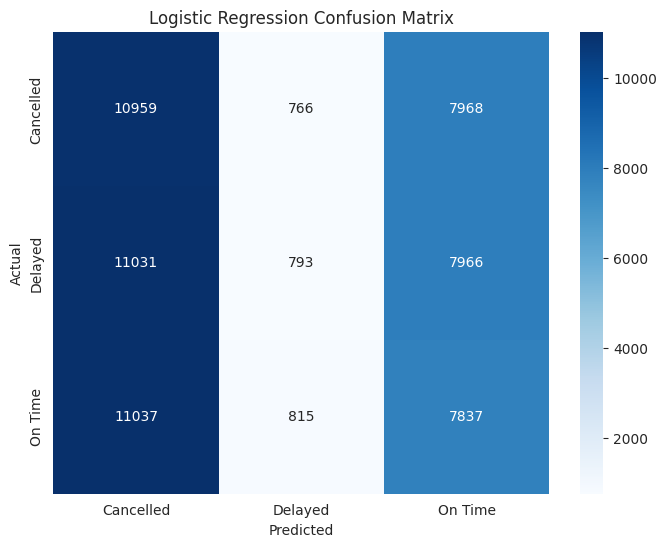

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define hyperparameter grids for each classifier
# Hyperparameter grids for RandomizedSearchCV
param_grids = {
    "Random Forest": {
        "n_estimators": randint(50, 200),
        "max_depth": [None, 10, 20],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5)
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5)
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    },
    "Logistic Regression": {
        "C": uniform(0.001, 100),
        "penalty": ['l1', 'l2']
    }
}

# Hy

# Train and evaluate each classifier
for name, model in classifiers.items():
    print(f"\n{name} Classifier:")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_rep)

    # Print feature importances for tree-based models
    if name in ["Random Forest", "Decision Tree"]:
        feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        print(f"{name} Feature Importances:")
        print(feature_importances)

    # Plot confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Hyperparameter tuning and cross-validation
for name, model in classifiers.items():
    if name in param_grids:
        print(f"\nHyperparameter Tuning for {name} Classifier:")
        param_grids = param_grids[name]
        random_search = RandomizedSearchCV(model, param_distributions=param_grids, n_iter=10, cv=5, scoring='accuracy', random_state=42)
        random_search.fit(X_train, y_train)

        # Get the best parameters and retrain the model
        best_params = random_search.best_params_
        print(f"Best Hyperparameters: {best_params}")
        model.set_params(**best_params)

        # Make predictions on the test set with tuned hyperparameters
        y_pred_tuned = model.predict(X_test)

        # Evaluate the model with tuned hyperparameters
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        classification_rep_tuned = classification_report(y_test, y_pred_tuned)

        print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
        print("Tuned Model Classification Report:")
        print(classification_rep_tuned)

        # Plot confusion matrix for tuned model as a heatmap
        cm_tuned = confusion_matrix(y_test, y_pred_tuned)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'{name} Tuned Model Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()



Hyperparameter Tuning for Random Forest Classifier:
